In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import contextily as cx # Library to fetch basemaps
import geopandas as gpd # Library for geographic data structures

Loading of the datasets into separate dataframes, the dataframes will later be joined in order to get a single dataframe containing all the information regarding both the tracks and the aritsts performing them. We also print the head of each dataframe to get an initial idea about the different attributes and how they are populated

In [2]:
artists = 'dataset/artists.csv'
tracks = 'dataset/tracks.csv'

index_col = 0
df_artists = pd.read_csv(artists, sep=';', index_col=index_col)
df_tracks = pd.read_csv(tracks, index_col=index_col)

pd.set_option('display.max_columns', None)

In [3]:
df_artists.head(10)

name gender  birth_date birth_place nationality  \
id_author                                                               
ART82291002       99 posse      M         NaN         NaN         NaN   
ART53496045  achille lauro      M  1990-07-11      Verona      Italia   
ART18853907           alfa      M         NaN         NaN         NaN   
ART64265460      anna pepe      F         NaN         NaN         NaN   
ART75741740    articolo 31      M         NaN         NaN         NaN   
ART24123617        babaman      M  1975-08-08         Rho      Italia   
ART40229749         baby k      F  1983-02-05   Singapore      Italia   
ART56320683  bassi maestro      M  1973-08-03      Milano      Italia   
ART19605256           beba      F         NaN         NaN         NaN   
ART02666525        bigmama      F         NaN         NaN         NaN   

                                                   description active_start  \
id_author                                                                     
ART82291002                           gruppo musicale italiano   1991-01-01   
ART53496045               cantautore e rapper italiano (1990-)   2012-01-01   
ART18853907                                                NaN          NaN   
ART64265460                                                NaN          NaN   
ART75741740                   gruppo musicale hip hop italiano   1990-01-01   
ART24123617                                  cantante italiano          NaN   
ART40229749              cantautrice e rapper italiana (1983-)   2007-01-01   
ART56320683  rapper, disc jockey, beatmaker e produttore di...   1988-01-01   
ART19605256                                            cognome          NaN   
ART02666525                                                NaN   2001-01-01   

             active_end province     region country   latitude  longitude  
id_author                                                                  
ART82291002         NaN      NaN        NaN     NaN        NaN        NaN  
ART53496045         NaN   Verona     Veneto  Italia  45.442498  10.985738  
ART18853907         NaN      NaN        NaN     NaN        NaN        NaN  
ART64265460         NaN      NaN        NaN     NaN        NaN        NaN  
ART75741740         NaN      NaN        NaN     NaN        NaN        NaN  
ART24123617         NaN   Milano  Lombardia  Italia  45.528878   9.041560  
ART40229749         NaN      NaN        NaN     NaN  45.080627   7.670717  
ART56320683         NaN   Milano  Lombardia  Italia  45.464194   9.189635  
ART19605256         NaN      NaN        NaN     NaN        NaN        NaN  
ART02666525         NaN      NaN        NaN     NaN        NaN        NaN

In [4]:
df_tracks.head(10)

id_artist    name_artist  \
id                                     
TR934808  ART04205421  Rosa Chemical   
TR760029  ART04205421  Rosa Chemical   
TR916821  ART04205421  Rosa Chemical   
TR480968  ART04205421  Rosa Chemical   
TR585039  ART04205421  Rosa Chemical   
TR550335  ART04205421  Rosa Chemical   
TR170793  ART04205421  Rosa Chemical   
TR627195  ART04205421  Rosa Chemical   
TR628871  ART04205421  Rosa Chemical   
TR700756  ART04205421  Rosa Chemical   

                                                 full_title          title  \
id                                                                           
TR934808    ​polka 2 :-/ by Rosa Chemical (Ft. Ernia & Guè)   ​polka 2 :-/   
TR760029         POLKA by Rosa Chemical (Ft. Thelonious B.)          POLKA   
TR916821  ​britney ;-) by Rosa Chemical (Ft. MamboLosco ...   ​britney ;-)   
TR480968                  CEO by Rosa Chemical (Ft. Taxi B)            CEO   
TR585039                LONDRA by Rosa Chemical (Ft. Rkomi)         LONDRA   
TR550335                            BOHEME by Rosa Chemical         BOHEME   
TR170793                         LOBBY WAY by Rosa Chemical      LOBBY WAY   
TR627195             SLATT by Rosa Chemical (Ft. Dani Faiv)          SLATT   
TR628871                     MADE IN ITALY by Rosa Chemical  MADE IN ITALY   
TR700756                       ROSE & ROVI by Rosa Chemical    ROSE & ROVI   

             featured_artists primary_artist language  \
id                                                      
TR934808           Ernia, Guè  Rosa Chemical       pl   
TR760029        Thelonious B.  Rosa Chemical       en   
TR916821  MamboLosco, RADICAL  Rosa Chemical       en   
TR480968               Taxi B  Rosa Chemical       it   
TR585039                Rkomi  Rosa Chemical       en   
TR550335                  NaN  Rosa Chemical       it   
TR170793                  NaN  Rosa Chemical       it   
TR627195            Dani Faiv  Rosa Chemical       en   
TR628871                  NaN  Rosa Chemical       it   
TR700756                  NaN  Rosa Chemical       it   

                              album  stats_pageviews  swear_IT  swear_EN  \
id                                                                         
TR934808           FOREVER AND EVER         196033.0        13         6   
TR760029           FOREVER AND EVER         164450.0         9        12   
TR916821           FOREVER AND EVER          58313.0        16        12   
TR480968          OKAY OKAY !! - EP          39890.0         8         3   
TR585039           FOREVER AND EVER          35432.0         1         0   
TR550335           FOREVER AND EVER          34443.0         2         0   
TR170793           FOREVER AND EVER          29265.0         5         2   
TR627195           FOREVER AND EVER          26902.0         7        13   
TR628871   Festival di Sanremo 2023          19724.0         0         2   
TR700756           FOREVER AND EVER          19148.0         4         5   

                                             swear_IT_words  \
id                                                            
TR934808  ['cazzo', 'cesso', 'coglioni', 'figa', 'merda'...   
TR760029  ['cazzo', 'culo', 'frocio', 'puttana', 'sega',...   
TR916821    ['bastardo', 'cazzo', 'culo', 'merda', 'troia']   
TR480968  ['cazzo', 'culo', 'fottere', 'merda', 'pompino...   
TR585039                                          ['cazzo']   
TR550335                                          ['cazzo']   
TR170793                      ['cazzo', 'cesso', 'scopare']   
TR627195                                  ['cazzo', 'figo']   
TR628871                                                 []   
TR700756                                        ['scopare']   

                                            swear_EN_words    year  month  \
id                                                                          
TR934808               ['bitch', 'fuck', 'porno', 'pussy']  2021.0    4.0   
TR760029

Checking the info and non-null values for each attribute for all records in both datasets.
The initial assessment of both the df_tracks and df_artists datasets, performed by examining attribute information and non-null value counts, immediately revealed a significant proportion of missing data. 

Several attributes exhibit high degrees of incompleteness; for example, the stats_pageviews column in df_tracks is nearly 60% null, and the df_artists dataframe contains multiple fields with similarly high null percentages, including the entirely empty active_end attribute. 

Our data cleaning strategy will prioritize a sensible imputation of these missing values where possible. The complete removal of a column will be reserved as a last resort, used only when high null cardinality prevents meaningful imputation and the attribute risks introducing noise or bias into the analysis.

In [5]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11166 entries, TR934808 to TR552777
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_artist             11166 non-null  object 
 1   name_artist           11166 non-null  object 
 2   full_title            11166 non-null  object 
 3   title                 11166 non-null  object 
 4   featured_artists      3517 non-null   object 
 5   primary_artist        11166 non-null  object 
 6   language              11061 non-null  object 
 7   album                 9652 non-null   object 
 8   stats_pageviews       4642 non-null   float64
 9   swear_IT              11166 non-null  int64  
 10  swear_EN              11166 non-null  int64  
 11  swear_IT_words        11166 non-null  object 
 12  swear_EN_words        11166 non-null  object 
 13  year                  10766 non-null  object 
 14  month                 9969 non-null   float64
 15  day           

In [6]:
df_artists.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, ART82291002 to ART83631935
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          104 non-null    object 
 1   gender        104 non-null    object 
 2   birth_date    73 non-null     object 
 3   birth_place   72 non-null     object 
 4   nationality   71 non-null     object 
 5   description   86 non-null     object 
 6   active_start  50 non-null     object 
 7   active_end    0 non-null      float64
 8   province      70 non-null     object 
 9   region        68 non-null     object 
 10  country       70 non-null     object 
 11  latitude      72 non-null     float64
 12  longitude     72 non-null     float64
dtypes: float64(3), object(10)
memory usage: 11.4+ KB


The initial inspection revealed that a majority of the attributes across both dataframes were automatically assigned the generic object data type. This misclassification is likely a consequence of type heterogeneity within the columns, often caused by the presence of missing values (e.g., NumPy's NaN), erroneous non-numeric entries, or mixed data formats.

Before proceeding with imputation or feature engineering, a preliminary data cleaning phase is necessary. We will systematically enforce type consistency by casting attributes to their appropriate data types based on their underlying semantics (e.g., converting strings representing dates to datetime, or numeric strings to float or int). This step is foundational, as correct data types are essential for accurate analysis, proper handling of missing values, and efficient memory usage.

---

In [7]:
df_artists['gender'] = df_artists['gender'].astype('category')
df_artists['nationality'] = df_artists['nationality'].astype('category')
df_artists['country'] = df_artists['country'].astype('category')
df_artists['region'] = df_artists['region'].astype('category')
df_artists['province'] = df_artists['province'].astype('category')
df_artists['birth_place'] = df_artists['birth_place'].astype('category')
df_artists['birth_date'] = pd.to_datetime(df_artists['birth_date'], errors='coerce')
df_artists['active_start'] = pd.to_datetime(df_artists['active_start'], errors='coerce')
df_artists['description'] = df_artists['description'].astype('string')
df_artists['name'] = df_artists['name'].astype('string')

In [8]:
df_tracks['id_artist'] = df_tracks['id_artist'].astype('category')
df_tracks['id_album'] = df_tracks['id_album'].astype('category')
df_tracks['language'] = df_tracks['language'].astype('category')
df_tracks['album_type'] = df_tracks['album_type'].astype('category')
df_tracks['stats_pageviews'] = df_tracks['stats_pageviews'].astype('Int64')
df_tracks['year'] = pd.to_numeric(df_tracks['year'], errors = 'coerce').astype('Int64')
df_tracks['month'] = pd.to_numeric(df_tracks['month'], errors = 'coerce').astype('Int64')
df_tracks['day'] = pd.to_numeric(df_tracks['day'], errors = 'coerce').astype('Int64')
df_tracks['popularity'] = pd.to_numeric(df_tracks['popularity'], errors = 'coerce').astype('Int64')
df_tracks['n_sentences'] = df_tracks['n_sentences'].astype('Int64')
df_tracks['n_tokens'] = df_tracks['n_tokens'].astype('Int64')
df_tracks['disc_number'] = df_tracks['disc_number'].astype('Int64')
df_tracks['track_number'] = df_tracks['track_number'].astype('Int64')
df_tracks['explicit'] = df_tracks['explicit'].astype('bool')
df_tracks['modified_popularity'] = df_tracks['modified_popularity'].astype('bool')
df_tracks['album_release_date'] = pd.to_datetime(df_tracks['album_release_date'], errors='coerce')
df_tracks['name_artist'] = df_tracks['name_artist'].astype('string')
df_tracks['full_title'] = df_tracks['full_title'].astype('string')
df_tracks['title'] = df_tracks['title'].astype('string')
df_tracks['featured_artists'] = df_tracks['featured_artists'].astype('string')
df_tracks['primary_artist'] = df_tracks['primary_artist'].astype('string')
df_tracks['album_name'] = df_tracks['album_name'].astype('string')
df_tracks['album'] = df_tracks['album'].astype('string')
df_tracks['album_image'] = df_tracks['album_image'].astype('string')
df_tracks['lyrics'] = df_tracks['lyrics'].astype('string')

In [9]:
import ast # Import the Abstract Syntax Tree module for safe evaluation

# Assuming your DataFrame is df_tracks and it's already loaded

def safe_literal_eval(value):
    """
    Safely converts a string representation of a list into a Python list.
    Handles NaN/missing values by returning an empty list or pd.NA.
    """
    if pd.isna(value) or value in (None, 'NaN', ''):
        # Return an empty list for missing values if you plan to iterate over it
        return []
    try:
        # Use ast.literal_eval for safe conversion of string-to-list
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        # Handle cases where the string is malformed or not a list structure
        print(f"Warning: Could not convert value: {value}")
        return [] # Default to empty list on failure

# Apply the conversion to both columns
df_tracks['swear_IT_words'] = df_tracks['swear_IT_words'].apply(safe_literal_eval)
df_tracks['swear_EN_words'] = df_tracks['swear_EN_words'].apply(safe_literal_eval)

In [10]:
df_artists.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, ART82291002 to ART83631935
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          104 non-null    string        
 1   gender        104 non-null    category      
 2   birth_date    72 non-null     datetime64[ns]
 3   birth_place   72 non-null     category      
 4   nationality   71 non-null     category      
 5   description   86 non-null     string        
 6   active_start  50 non-null     datetime64[ns]
 7   active_end    0 non-null      float64       
 8   province      70 non-null     category      
 9   region        68 non-null     category      
 10  country       70 non-null     category      
 11  latitude      72 non-null     float64       
 12  longitude     72 non-null     float64       
dtypes: category(6), datetime64[ns](2), float64(3), string(2)
memory usage: 10.7+ KB


In [11]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11166 entries, TR934808 to TR552777
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id_artist             11166 non-null  category      
 1   name_artist           11166 non-null  string        
 2   full_title            11166 non-null  string        
 3   title                 11166 non-null  string        
 4   featured_artists      3517 non-null   string        
 5   primary_artist        11166 non-null  string        
 6   language              11061 non-null  category      
 7   album                 9652 non-null   string        
 8   stats_pageviews       4642 non-null   Int64         
 9   swear_IT              11166 non-null  int64         
 10  swear_EN              11166 non-null  int64         
 11  swear_IT_words        11166 non-null  object        
 12  swear_EN_words        11166 non-null  object        
 13  year       

In [12]:
df_artists.describe()

birth_date         active_start  active_end   latitude  \
count                   72                   50         0.0  72.000000   
mean   1987-06-11 17:20:00  2003-04-27 22:33:36         NaN  43.591374   
min    1967-10-07 00:00:00  1988-01-01 00:00:00         NaN  37.747452   
25%    1980-08-24 12:00:00  1996-01-01 00:00:00         NaN  41.577547   
50%    1989-03-12 12:00:00  2004-01-01 00:00:00         NaN  45.067755   
75%    1993-12-20 18:00:00  2011-01-01 00:00:00         NaN  45.464194   
max    2002-04-29 00:00:00  2018-01-01 00:00:00         NaN  45.806691   
std                    NaN                  NaN         NaN   2.248674   

       longitude  
count  72.000000  
mean   11.060876  
min     7.525403  
25%     9.189635  
50%     9.917118  
75%    12.482932  
max    18.225226  
std     2.591871

In [13]:
df_tracks.describe()

stats_pageviews      swear_IT      swear_EN         year     month  \
count           4642.0  11166.000000  11166.000000      10728.0    9969.0   
mean      36993.646919      2.343006      0.711177  2012.651286  6.198515   
min             5006.0      0.000000      0.000000       1900.0       1.0   
25%            9642.25      0.000000      0.000000       2009.0       3.0   
50%            19099.5      1.000000      0.000000       2016.0       6.0   
75%           42011.75      3.000000      0.000000       2021.0      10.0   
max          1971207.0     72.000000     72.000000       2100.0      12.0   
std       58406.564657      3.704831      2.555423    33.288337  3.482992   

             day  n_sentences    n_tokens  tokens_per_sent  char_per_tok  \
count     9843.0      11090.0     11090.0     11090.000000  11090.000000   
mean   15.808697    59.399639  496.891253         8.672152      4.054416   
min          1.0          1.0         3.0         1.500000      2.000000   
25%          9.0         46.0       372.0         7.333333      3.866946   
50%         16.0         58.0       491.0         8.404762      4.012709   
75%         23.0         73.0       615.0         9.431527      4.168686   
max         31.0        437.0      3089.0       400.000000     12.000000   
std     8.881989    24.711996  209.187612         5.675602      0.445958   

       lexical_density  avg_token_per_clause           bpm      centroid  \
count     11090.000000          11090.000000  11102.000000  11102.000000   
mean          0.514367              8.002009    114.134841      0.137474   
min           0.000000              0.000000     59.970000      0.000000   
25%           0.482353              5.859020     91.910000      0.119200   
50%           0.511719              6.764171    106.975000      0.137200   
75%           0.542450              8.090909    134.650000      0.155100   
max           1.000000            660.000000    738.270000      0.298200   
std           0.061583             14.577876     26.827124      0.028131   

            rolloff          flux           rms           zcr      flatness  \
count  11102.000000  11102.000000  11102.000000  11102.000000  11102.000000   
mean    1616.965767      1.258893      0.223965      0.063322      0.859986   
min        0.000000      0.000000      0.000000      0.000000      0.109400   
25%     1222.457200      1.172025      0.186225      0.051000      0.841400   
50%     1551.018550      1.257100      0.229700      0.061700      0.882450   
75%     1935.570650      1.346875      0.267600      0.074100      0.913075   
max     8635.954200      1.928500      0.621900      0.268300      1.000000   
std      567.646409      0.137123      0.064592      0.017972      0.109106   

       spectral_complexity         pitch      loudness  \
count         11102.000000  11102.000000  11102.000000   
mean             27.410247   2256.028782     24.226955   
min               0.000000      0.000000      0.000000   
25%              21.881750   2003.341325     18.779500   
50%              27.330850   2241.157450     24.666850   
75%              32.978475   2493.492250     30.010175   
max              61.222500   3993.020300     81.947800   
std               8.441590    382.134853      8.648780   

                  album_release_date  disc_number  track_number   duration_ms  \
count                          10827      11088.0       11088.0  1.108800e+04   
mean   2017-03-13 16:42:25.635910144     1.016685      6.859127  2.035293e+05   
min              1962-04-10 00:00:00          1.0           1.0  1.142600e+04   
25%              2013-12-11 00:00:00          1.0           2.0  1.701310e+05   
50%              2018-09-07 00:00:00          1.0           6.0  1.966725e+05   
75%              2022-05-18 00:00:00          1.0          10.0  2.271840e+05   
max              2025-06-18 00:00:00          5.0          54.0  3.753057e+06   
std                              NaN     0.138903      5.191

With data types successfully standardized, the next crucial step involves generating histograms and density plots for all continuous and discrete numerical features, to gain foundational insight into the data's central tendency, spread, and the presence of potential outliers.

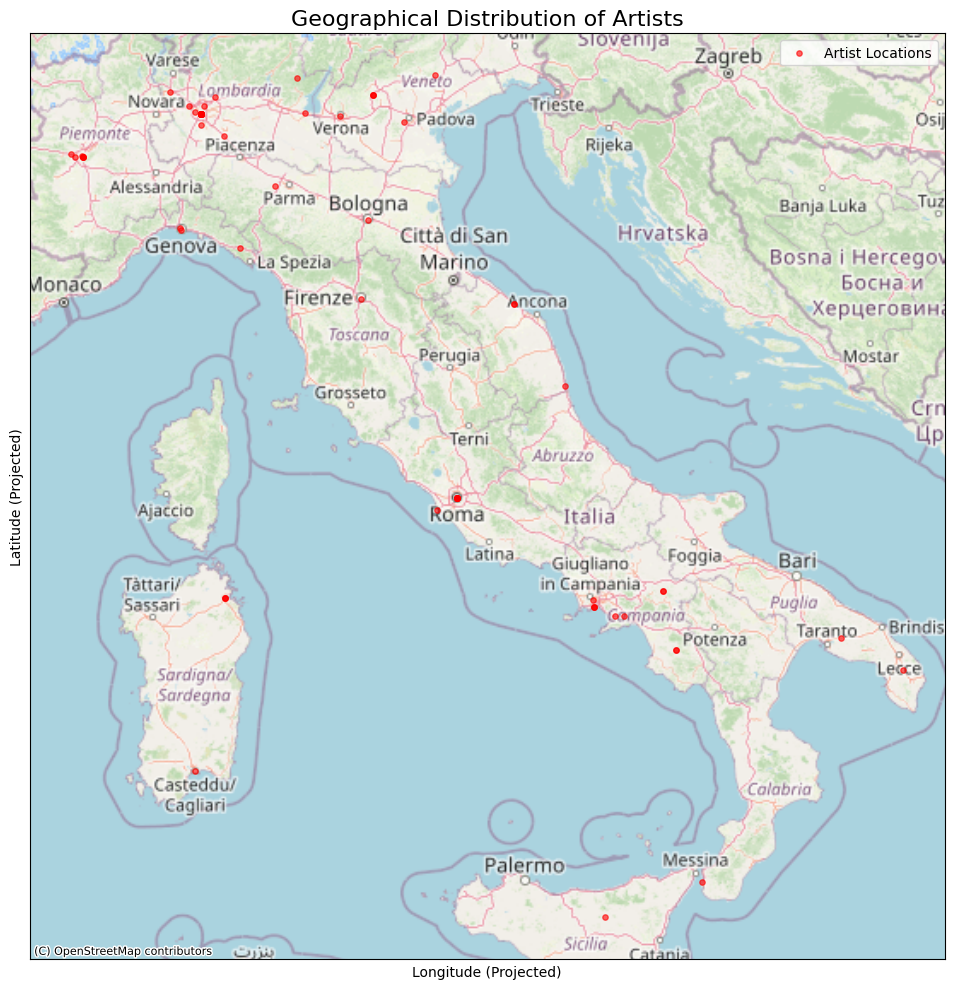

In [14]:
# --- 1. Create a GeoDataFrame ---
# GeoPandas is built on top of Pandas and uses shapely for geometry.
# We convert the regular DataFrame to a GeoDataFrame.
try:
    # Filter out any rows where coordinates are missing
    geo_df = pd.DataFrame({
        'latitude': df_artists['latitude'],
        'longitude': df_artists['longitude']
    }).dropna()

    if geo_df.empty:
        print("Error: Latitude or longitude columns are missing or entirely null. Cannot create map.")
    else:
        # Create a geometry column from the latitude and longitude columns
        # This is the crucial step for spatial visualization
        gdf = gpd.GeoDataFrame(
            geo_df, 
            geometry=gpd.points_from_xy(geo_df.longitude, geo_df.latitude),
            crs="EPSG:4326" # Standard coordinate system for Lat/Lon
        )
        
        # --- 2. Plotting the Data on a Map ---
        
        # Reproject to Web Mercator (EPSG:3857) for compatibility with contextily basemaps
        gdf_proj = gdf.to_crs(epsg=3857)

        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
        
        # Plot the points (the actual data)
        gdf_proj.plot(
            ax=ax, 
            marker='o', 
            color='red', 
            markersize=15, 
            alpha=0.6,
            label='Artist Locations'
        )
        
        # Add a basemap layer using contextily (this makes it look like a map)
        cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)
        
        # Set titles and labels
        ax.set_title("Geographical Distribution of Artists", fontsize=16)
        ax.set_xlabel("Longitude (Projected)")
        ax.set_ylabel("Latitude (Projected)")
        
        # Remove tick labels (since basemaps provide context)
        ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

        plt.legend()
        plt.tight_layout()
        plt.show()

except KeyError:
    print("Error: Please verify that 'latitude' and 'longitude' columns exist in your DataFrame (df_artists or df_tracks).")


---------------------------------------------------------------------------------------------------------------------------------

plotting the distribution for attribute: id_artist, else branch (Categorical)


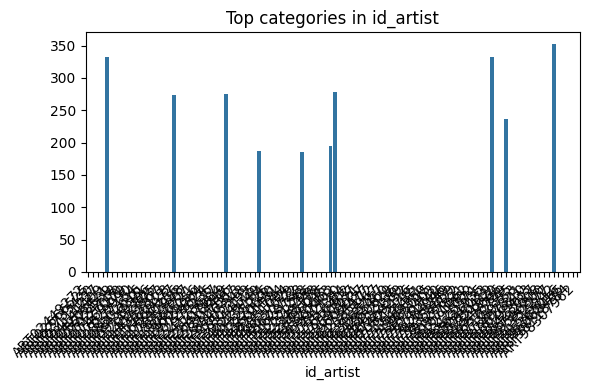

plotting the distribution for attribute: name_artist, else branch (Categorical)


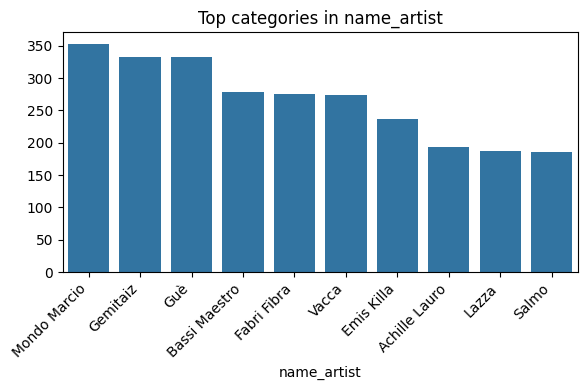

plotting the distribution for attribute: full_title, else branch (Categorical)


/tmp/ipykernel_134750/4214594416.py:39: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


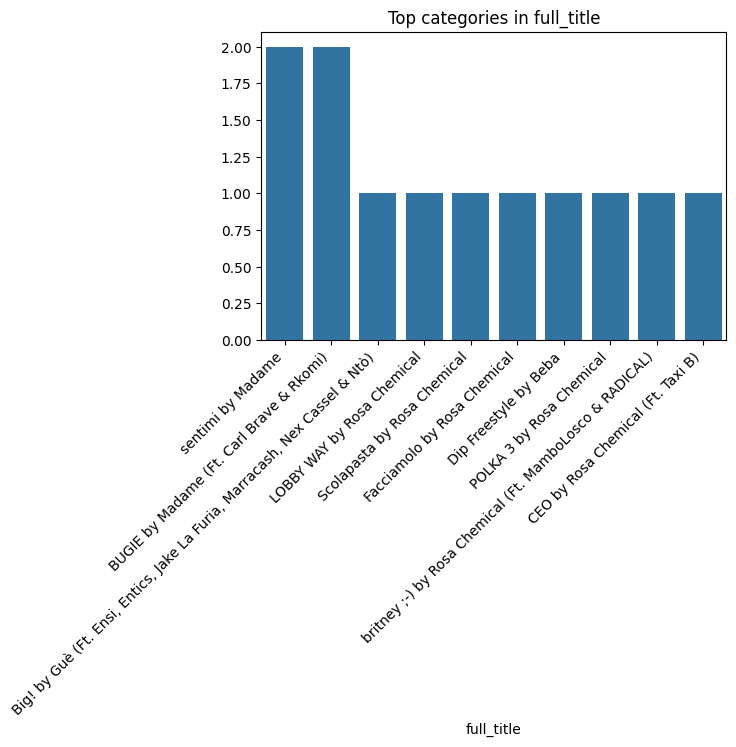

plotting the distribution for attribute: title, else branch (Categorical)


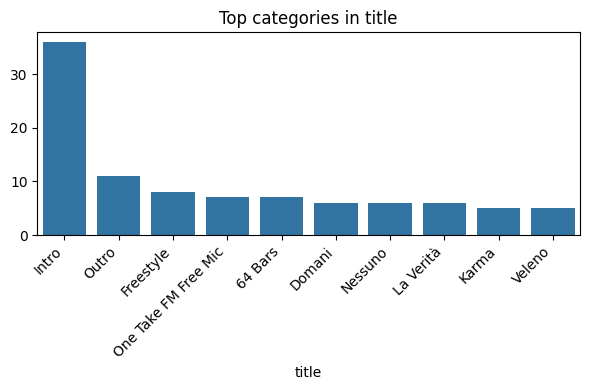

plotting the distribution for attribute: featured_artists, else branch (Categorical)


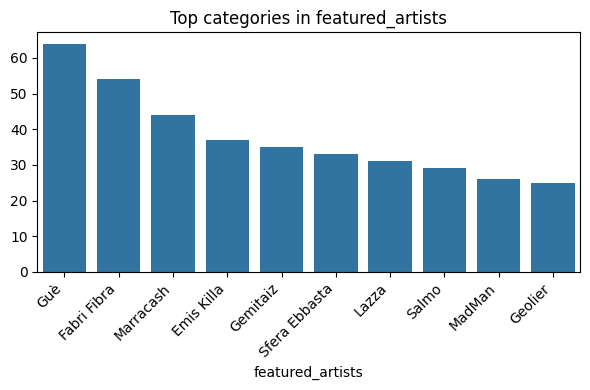

plotting the distribution for attribute: primary_artist, else branch (Categorical)


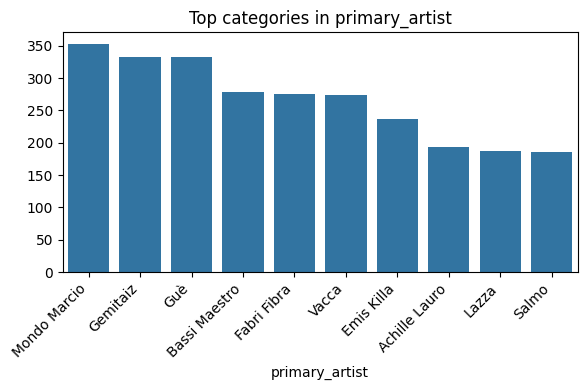

plotting the distribution for attribute: language, else branch (Categorical)


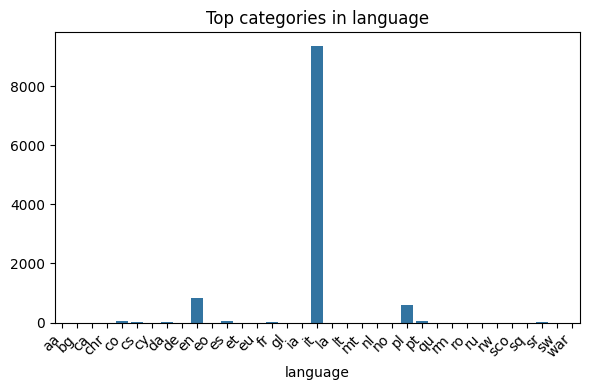

plotting the distribution for attribute: album, else branch (Categorical)


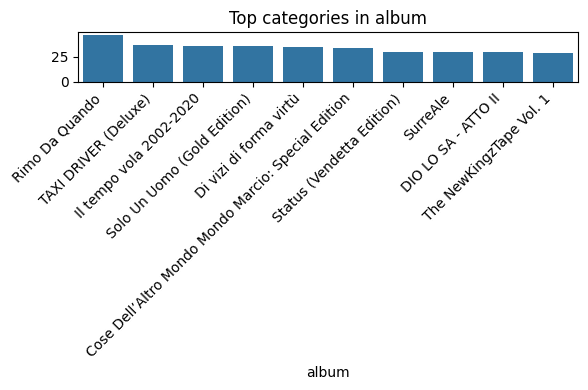

plotting the distribution for attribute: stats_pageviews, if branch (Numerical)


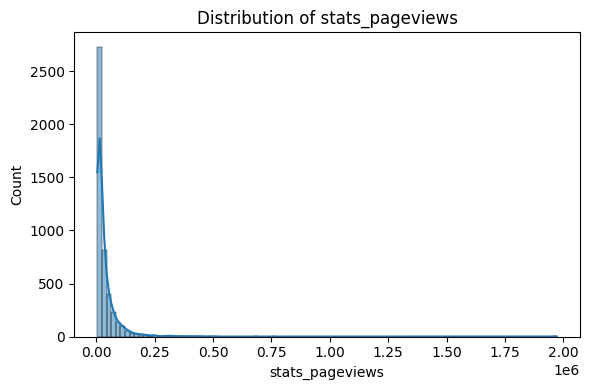

plotting the distribution for attribute: swear_IT, if branch (Numerical)


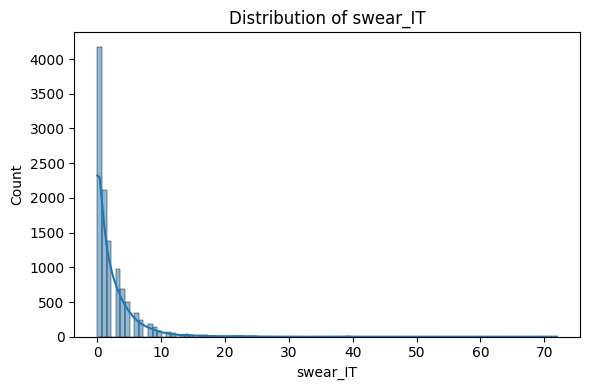

plotting the distribution for attribute: swear_EN, if branch (Numerical)


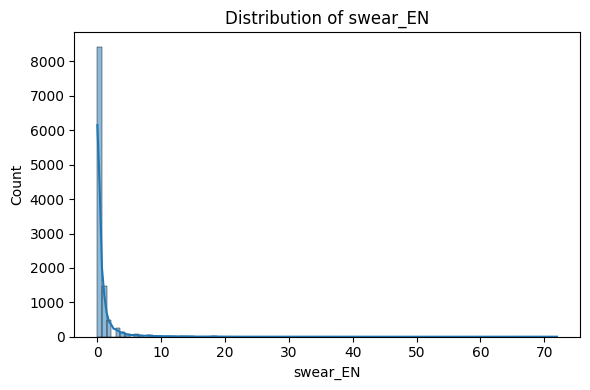

plotting the distribution for attribute: swear_IT_words, else branch (Categorical)
Skipping plot for swear_IT_words: Column contains unhashable types (e.g., Python lists).


<Figure size 600x400 with 0 Axes>

plotting the distribution for attribute: swear_EN_words, else branch (Categorical)
Skipping plot for swear_EN_words: Column contains unhashable types (e.g., Python lists).


<Figure size 600x400 with 0 Axes>

plotting the distribution for attribute: year, if branch (Numerical)


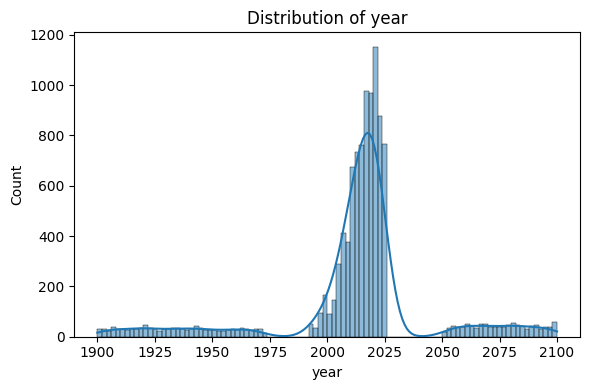

plotting the distribution for attribute: month, if branch (Numerical)


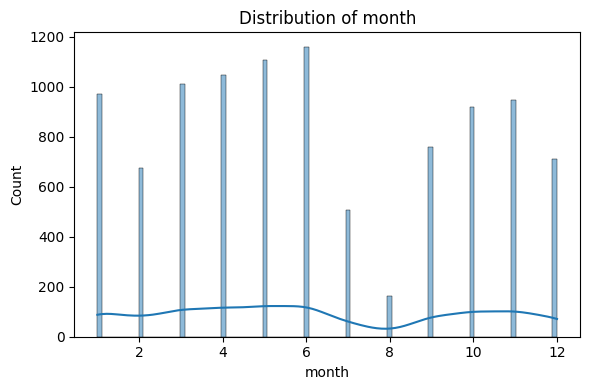

plotting the distribution for attribute: day, if branch (Numerical)


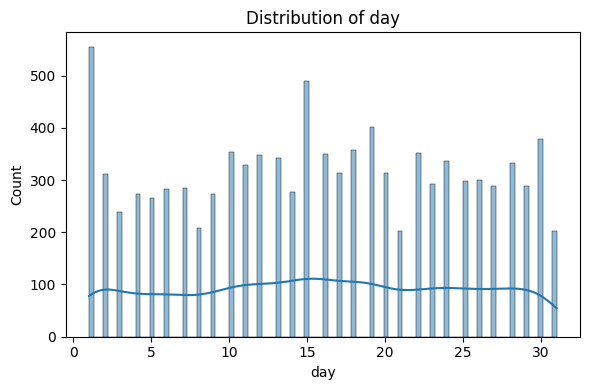

plotting the distribution for attribute: n_sentences, if branch (Numerical)


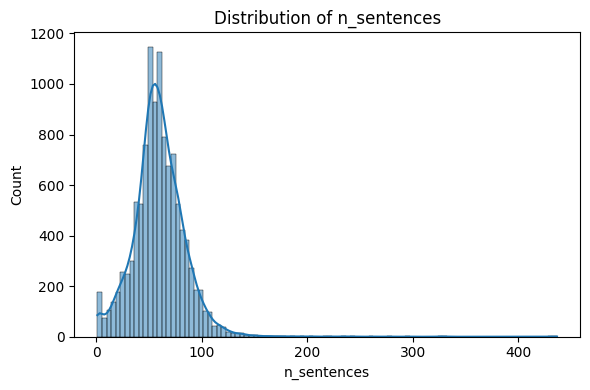

plotting the distribution for attribute: n_tokens, if branch (Numerical)


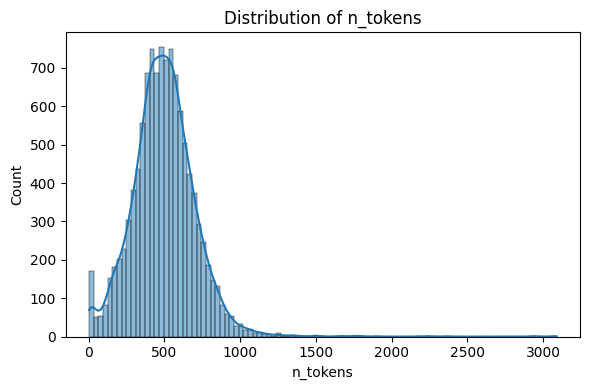

plotting the distribution for attribute: tokens_per_sent, if branch (Numerical)


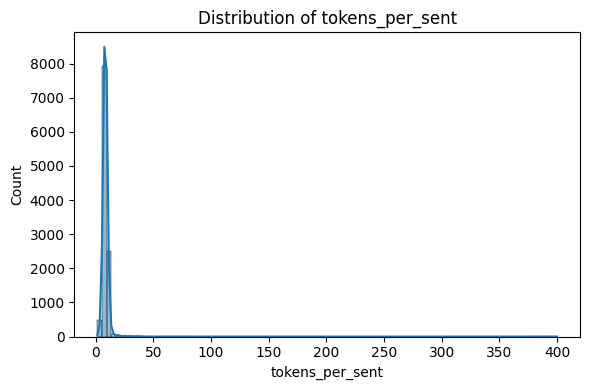

plotting the distribution for attribute: char_per_tok, if branch (Numerical)


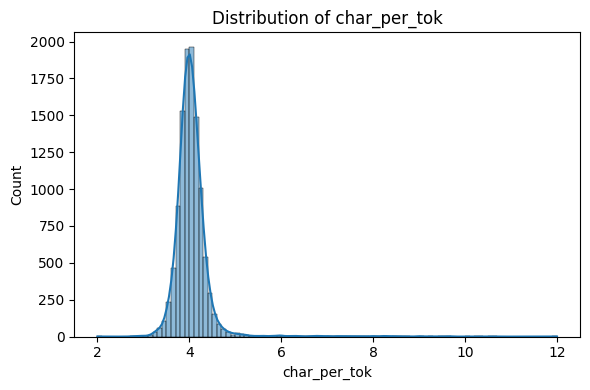

plotting the distribution for attribute: lexical_density, if branch (Numerical)


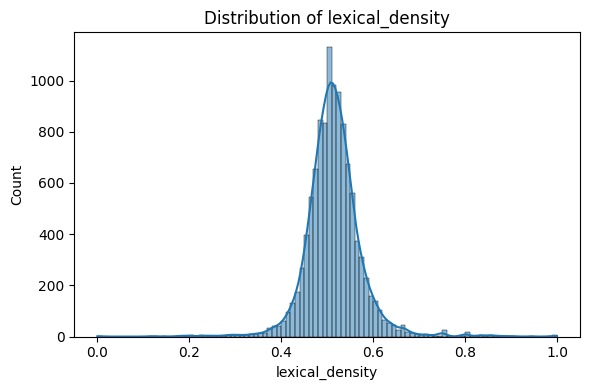

plotting the distribution for attribute: avg_token_per_clause, if branch (Numerical)


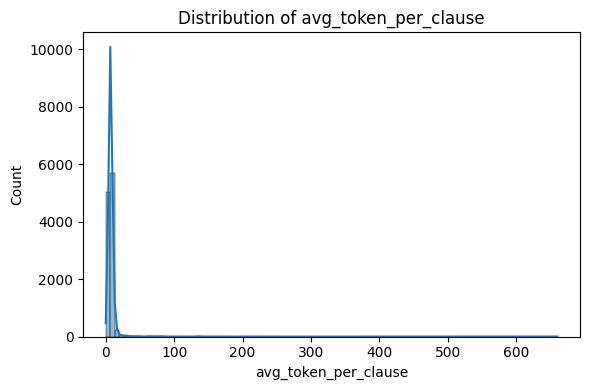

plotting the distribution for attribute: bpm, if branch (Numerical)


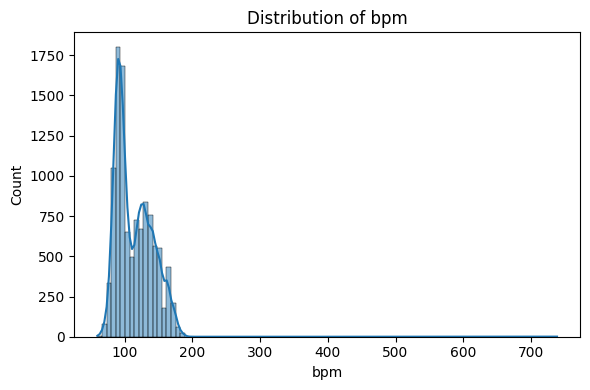

plotting the distribution for attribute: centroid, if branch (Numerical)


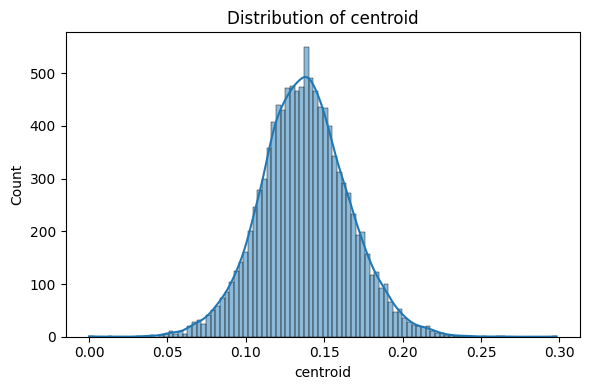

plotting the distribution for attribute: rolloff, if branch (Numerical)


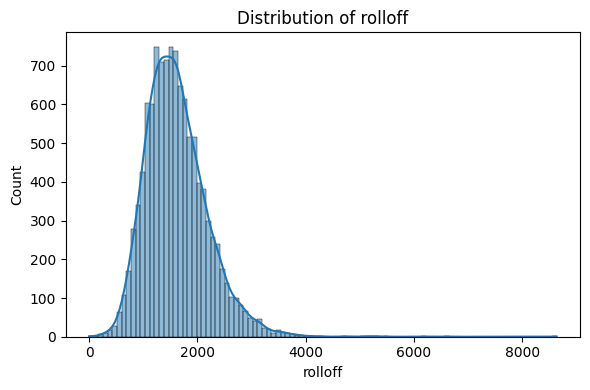

plotting the distribution for attribute: flux, if branch (Numerical)


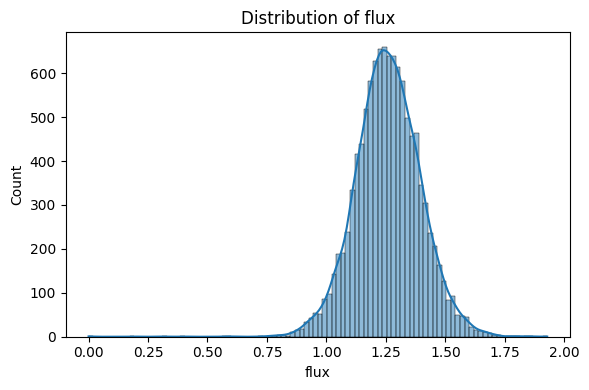

plotting the distribution for attribute: rms, if branch (Numerical)


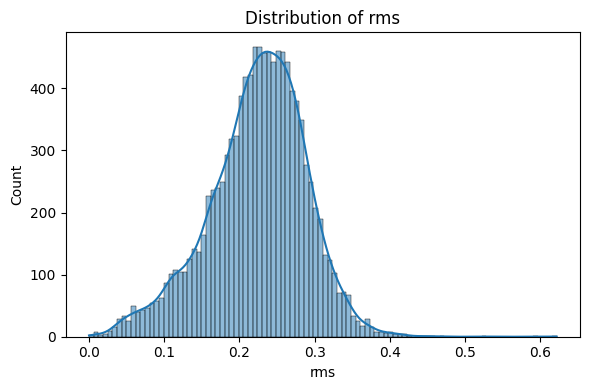

plotting the distribution for attribute: zcr, if branch (Numerical)


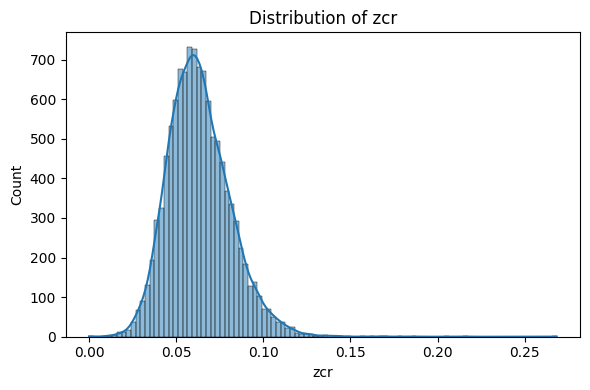

plotting the distribution for attribute: flatness, if branch (Numerical)


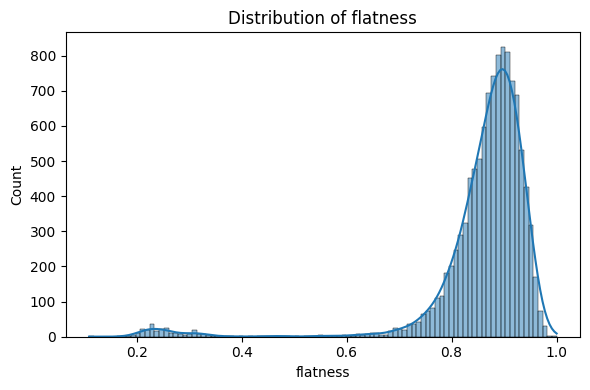

plotting the distribution for attribute: spectral_complexity, if branch (Numerical)


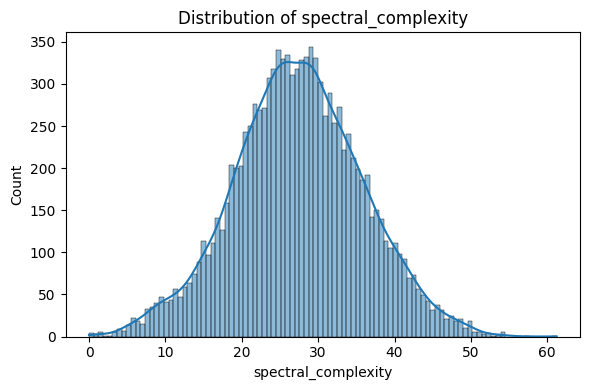

plotting the distribution for attribute: pitch, if branch (Numerical)


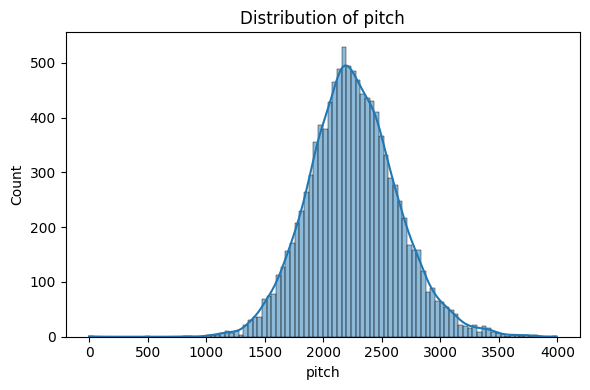

plotting the distribution for attribute: loudness, if branch (Numerical)


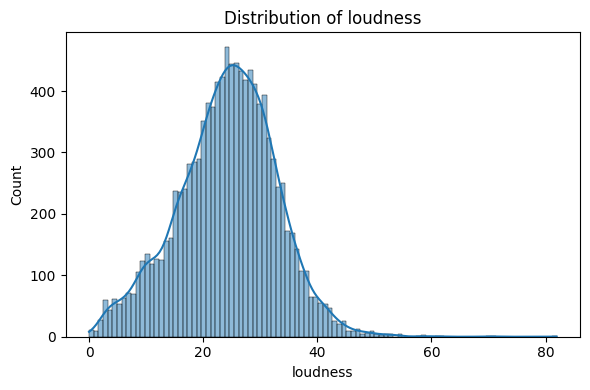

plotting the distribution for attribute: album_name, else branch (Categorical)


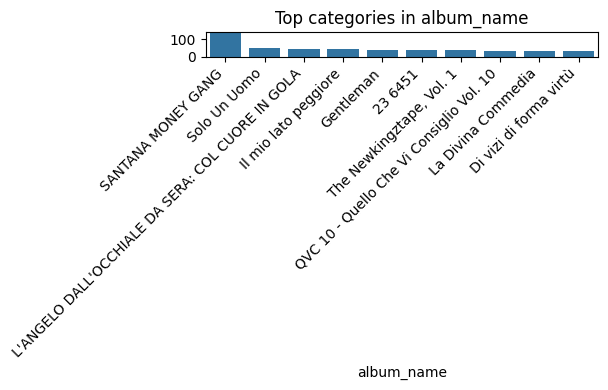

plotting the distribution for attribute: album_release_date, else branch (Categorical)


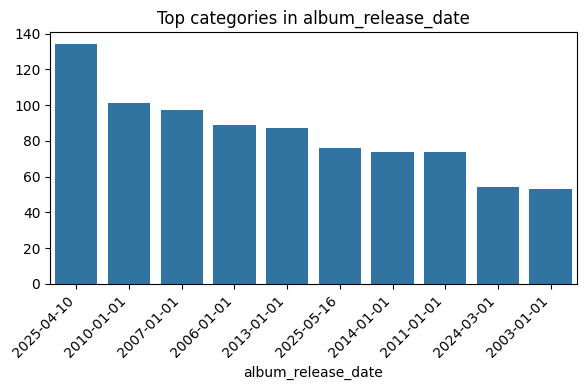

plotting the distribution for attribute: album_type, else branch (Categorical)


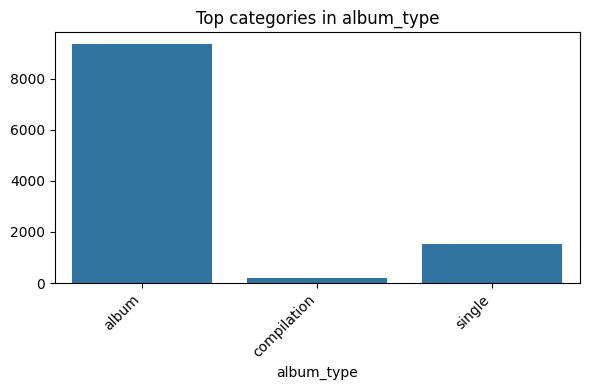

plotting the distribution for attribute: disc_number, if branch (Numerical)


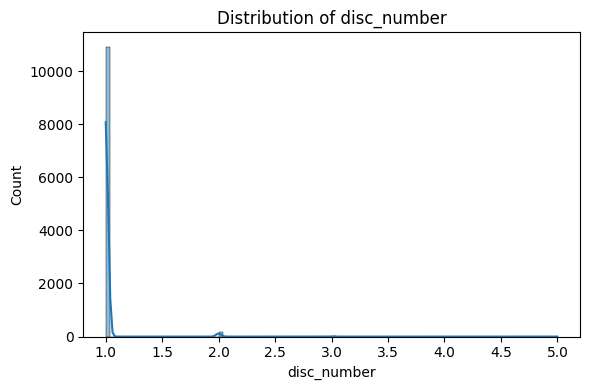

plotting the distribution for attribute: track_number, if branch (Numerical)


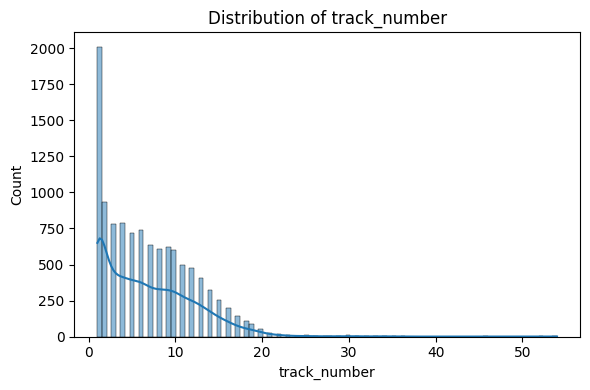

plotting the distribution for attribute: duration_ms, if branch (Numerical)


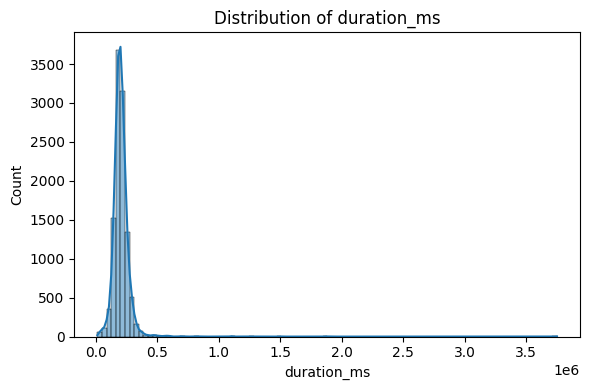

plotting the distribution for attribute: explicit, else branch (Categorical)


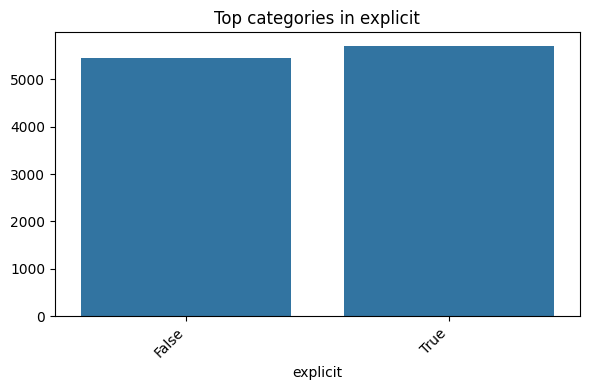

plotting the distribution for attribute: popularity, if branch (Numerical)


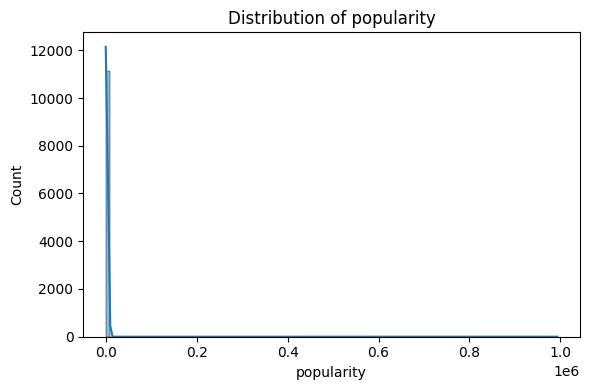

plotting the distribution for attribute: album_image, else branch (Categorical)


/tmp/ipykernel_134750/4214594416.py:39: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


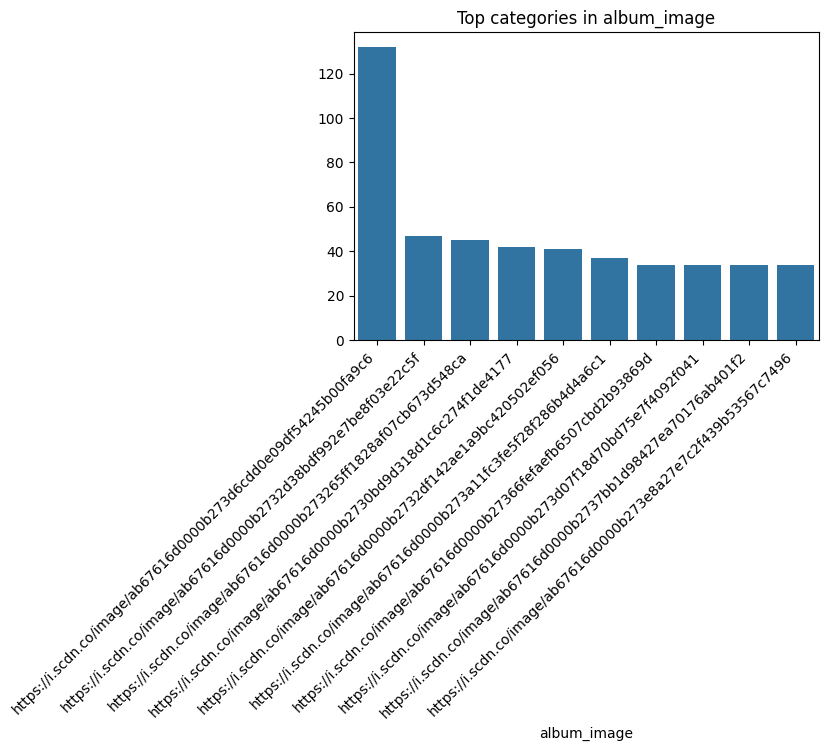

plotting the distribution for attribute: id_album, else branch (Categorical)


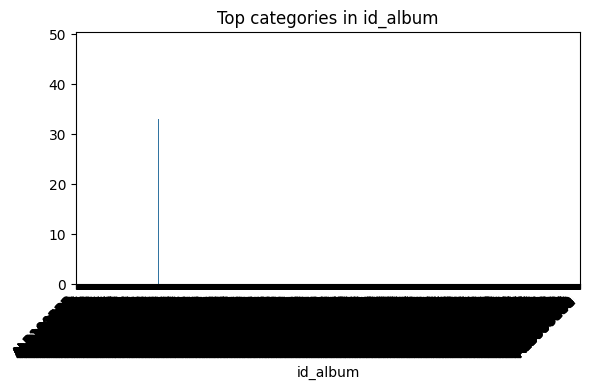

plotting the distribution for attribute: lyrics, else branch (Categorical)


/tmp/ipykernel_134750/4214594416.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


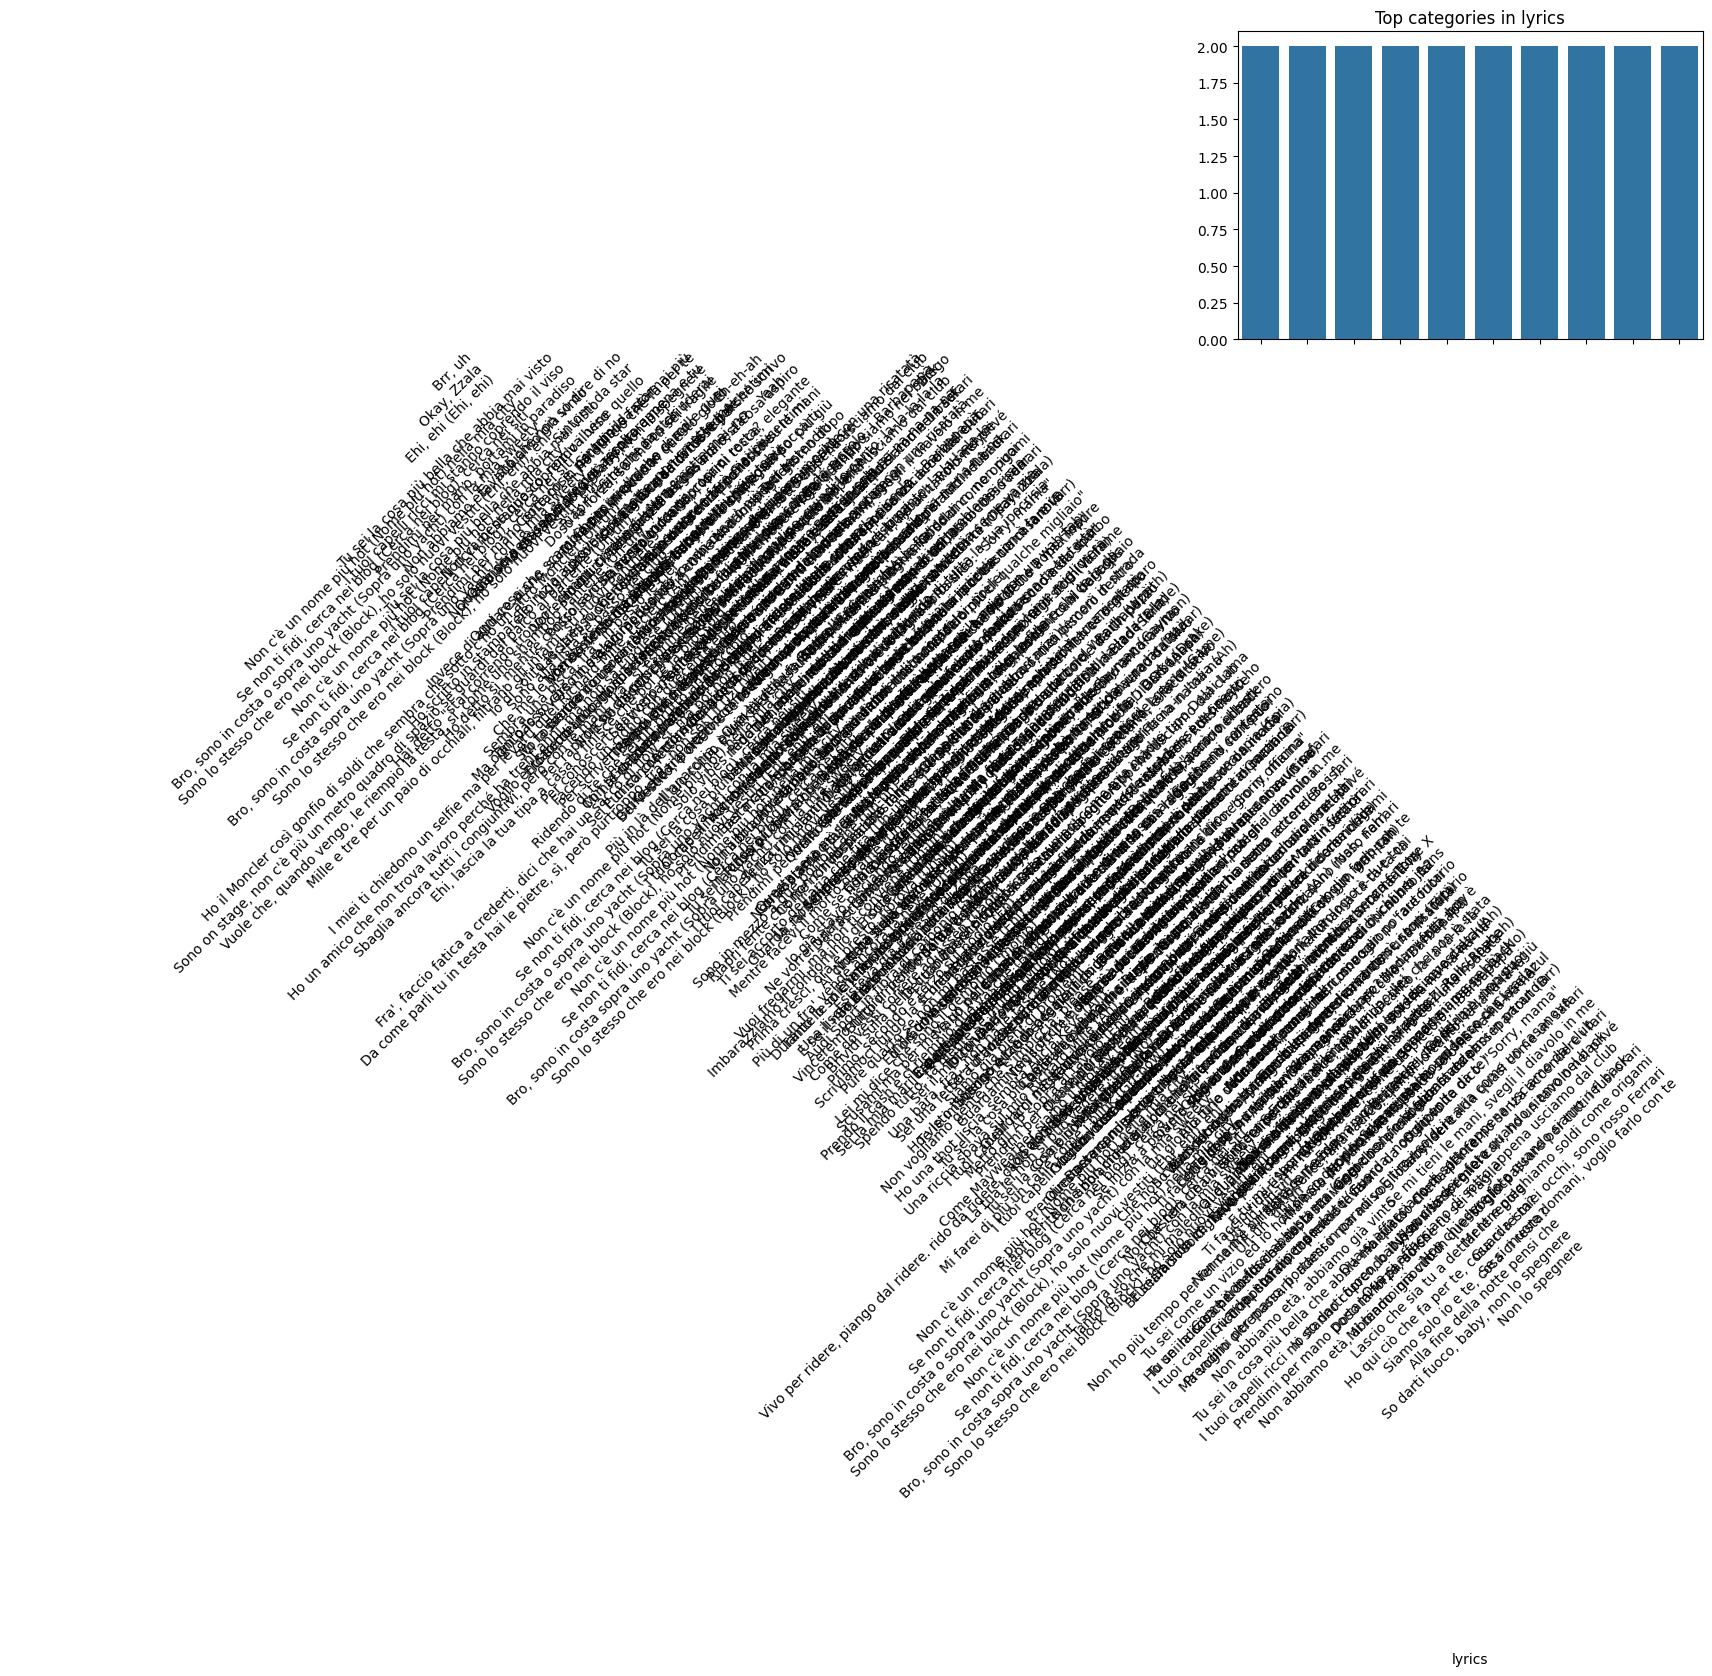

plotting the distribution for attribute: modified_popularity, else branch (Categorical)


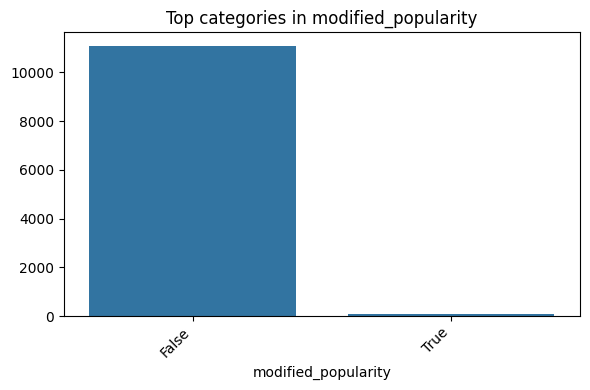

In [15]:
for col in df_tracks.columns:
    plt.figure(figsize=(6,4))
    
    # --- Check for Numerical Columns (includes float64, int64, and Nullable Int64) ---
    # Using .kind in 'fi' is a reliable way to check for all float and integer types
    if df_tracks[col].dtype.kind in 'fi': 
        print(f"plotting the distribution for attribute: {col}, if branch (Numerical)")
        
        data_to_plot = df_tracks[col].dropna()
            
        sns.histplot(data_to_plot, kde=True, bins = 100)
        plt.title(f'Distribution of {col}')

    # --- Handle Categorical/Object Columns, using try/except for unhashable types ---
    # We use a try/except to catch the 'unhashable type: list' error gracefully
    else:
        try:
            print(f"plotting the distribution for attribute: {col}, else branch (Categorical)")
            
            # The error occurs here if the column contains Python lists
            counts = df_tracks[col].value_counts().head(10)
            
            # Only proceed if there are values to plot
            if not counts.empty:
                sns.barplot(x=counts.index, y=counts.values)
                plt.title(f'Top categories in {col}')
                plt.xticks(rotation=45, ha='right')
            else:
                print(f"Skipping categorical plot for {col}: Value counts were empty.")

        except TypeError as e:
            # This handles the 'TypeError: unhashable type: 'list'' gracefully
            if 'unhashable type' in str(e):
                print(f"Skipping plot for {col}: Column contains unhashable types (e.g., Python lists).")
            else:
                # Re-raise any other unexpected TypeErrors
                raise e

    plt.tight_layout()
    plt.show()

The preceding visual analysis of attribute distributions has successfully illuminated several data quality issues, specifically the presence of erroneous values. These include instances such as:

* Temporal Inconsistencies: Values for the year attribute that fall outside the reasonable bounds defined by an artist's active_start and the current date.

* Domain Violations: Values for the popularity attribute that exceed its established domain maximum of 100.

These specific data integrity issues will be formally addressed and rectified in the subsequent Data Preparation phase. 

For the current Data Understanding phase, our objective remains strictly observational: to characterize the data's shape and quality without enacting any permanent modifications.We will now proceed with a preliminary, univariate outlier detection step. This involves plotting boxplots for each numerical attribute to visually quantify the number of data instances that fall outside the traditional whisker boundaries (typically defined by $1.5 \times \text{IQR}$). This process will yield a clearer, attribute-by-attribute assessment of the prevalence and extremity of outliers within the dataset.

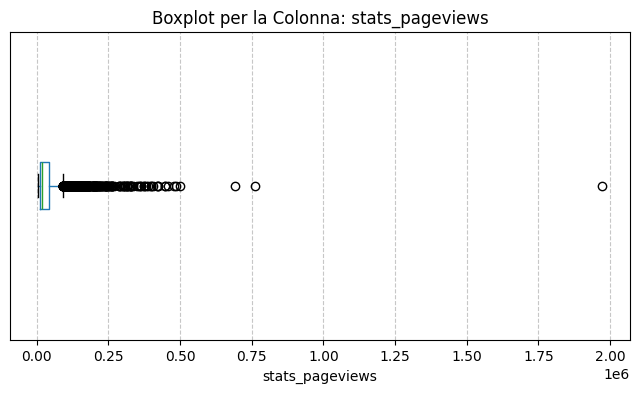

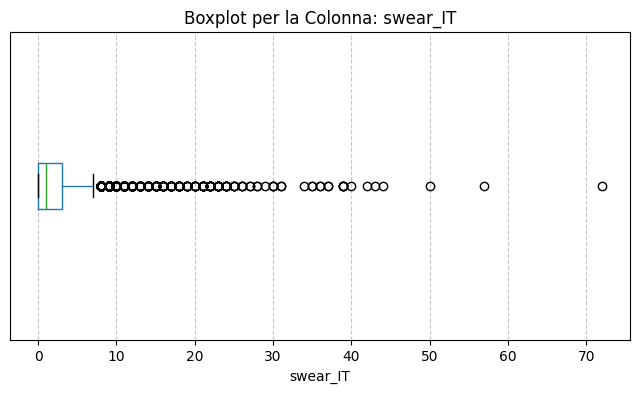

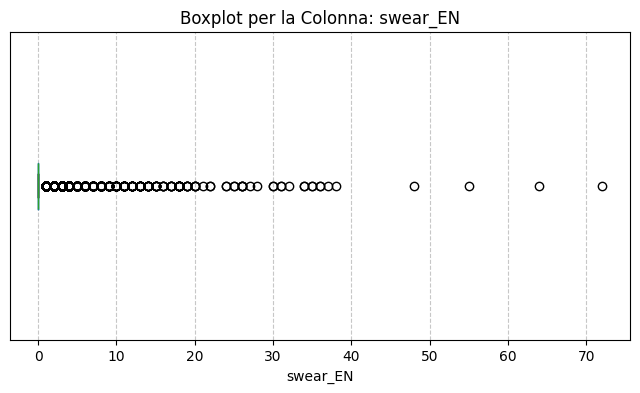

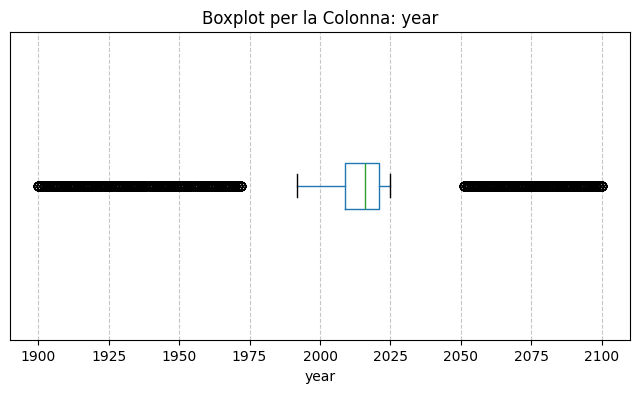

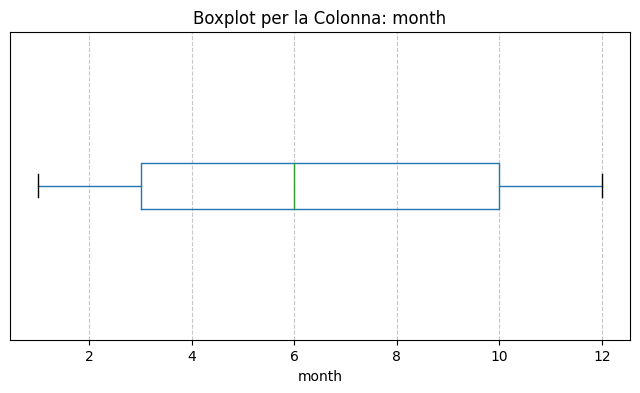

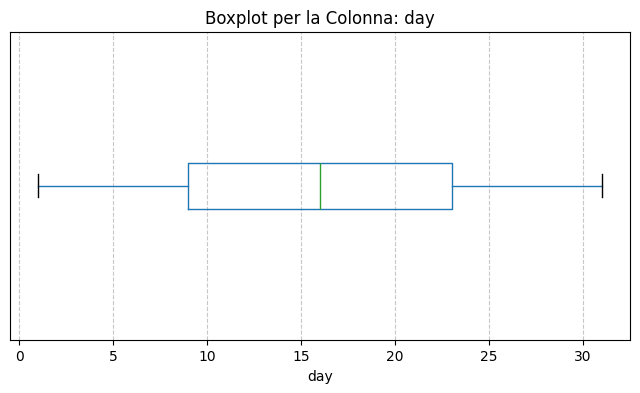

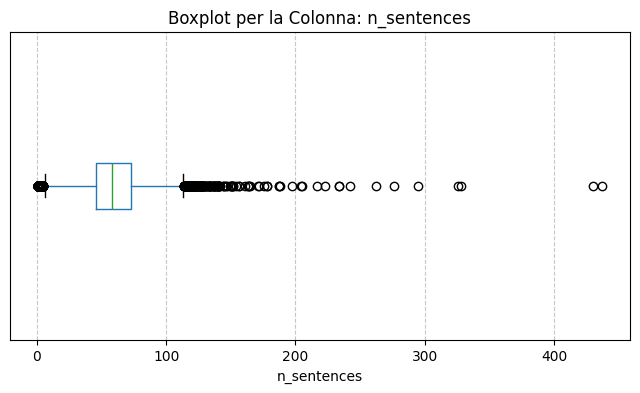

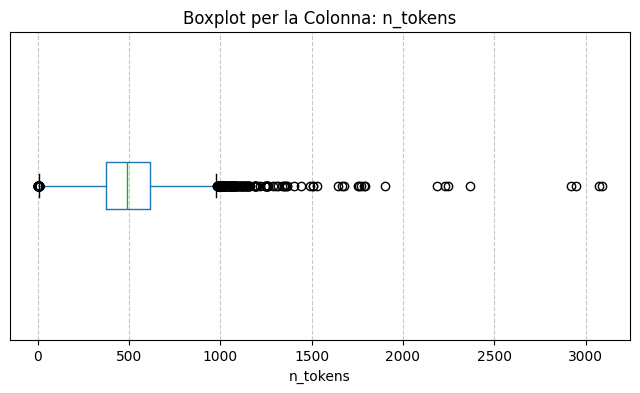

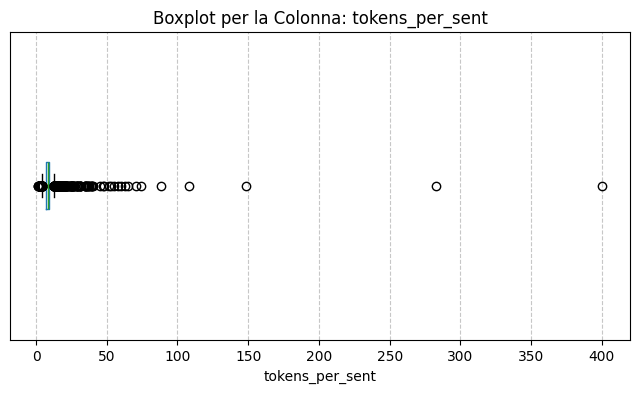

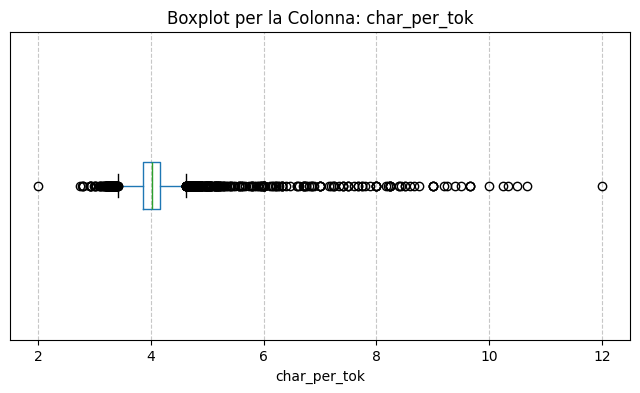

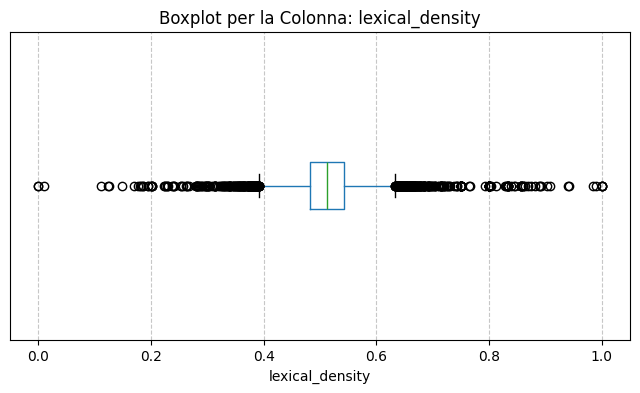

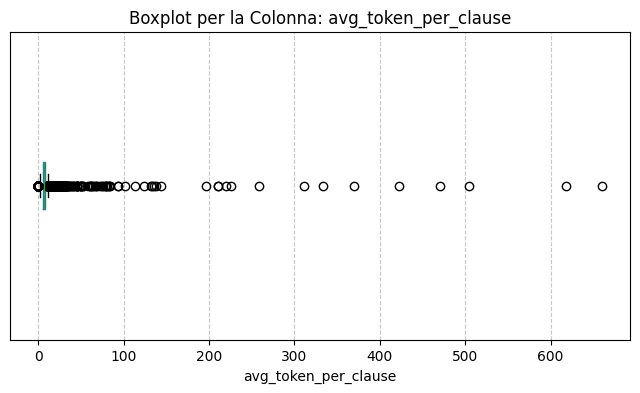

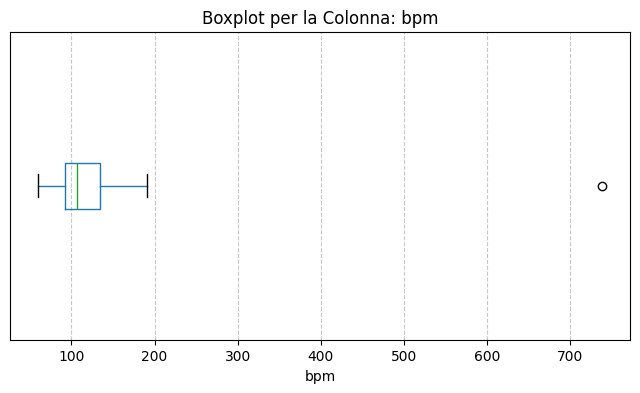

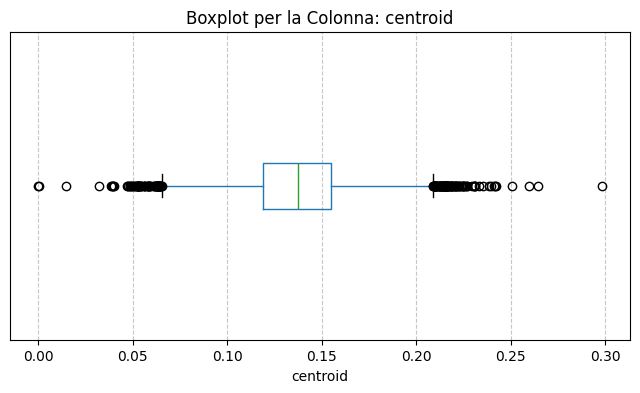

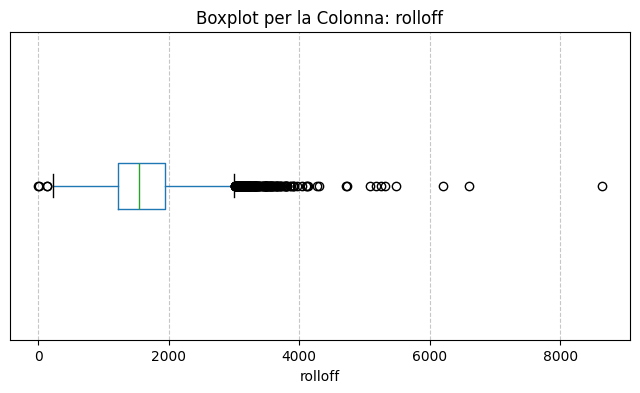

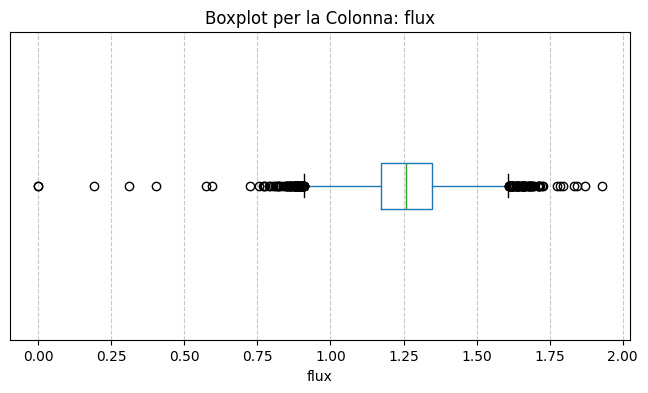

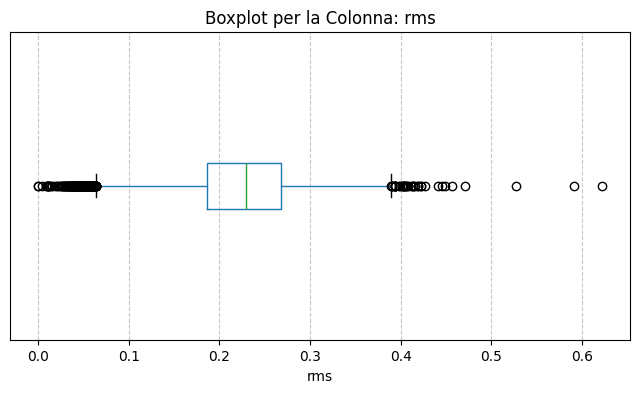

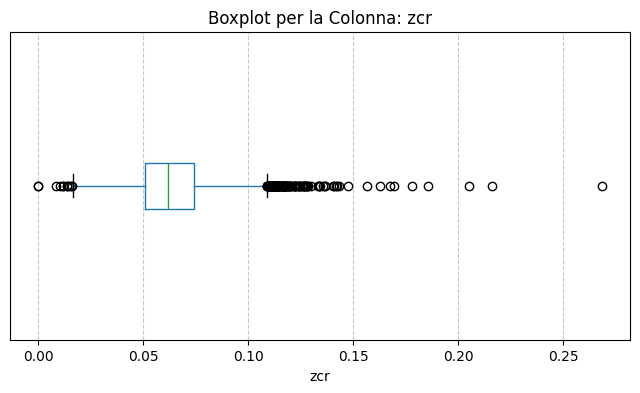

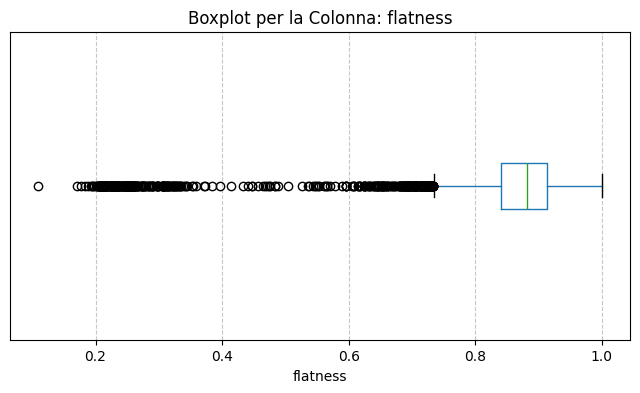

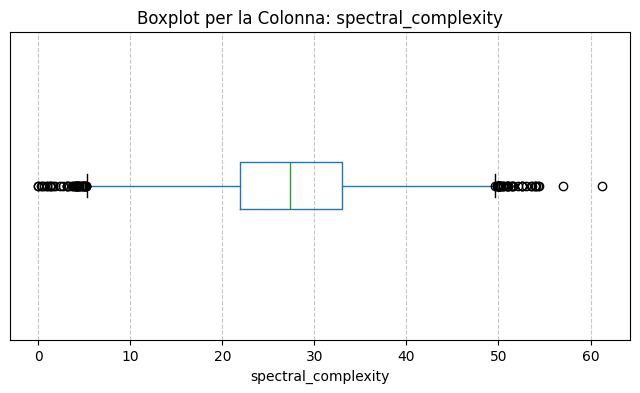

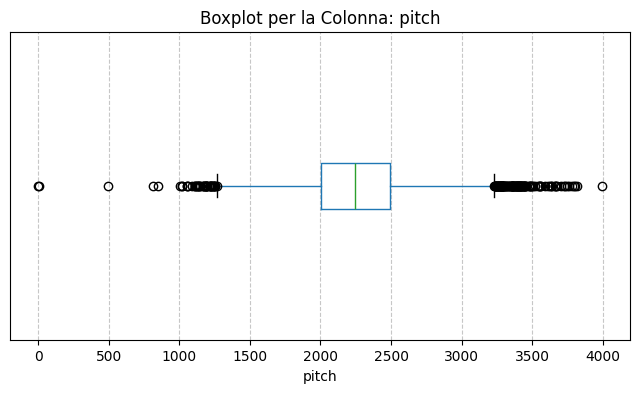

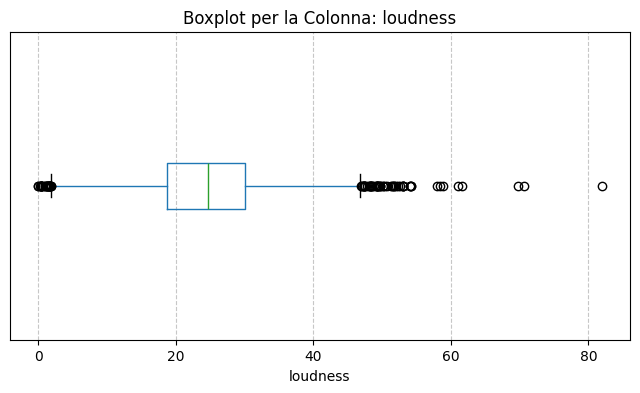

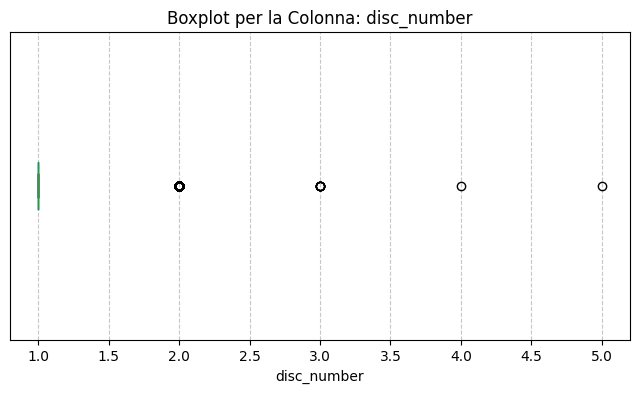

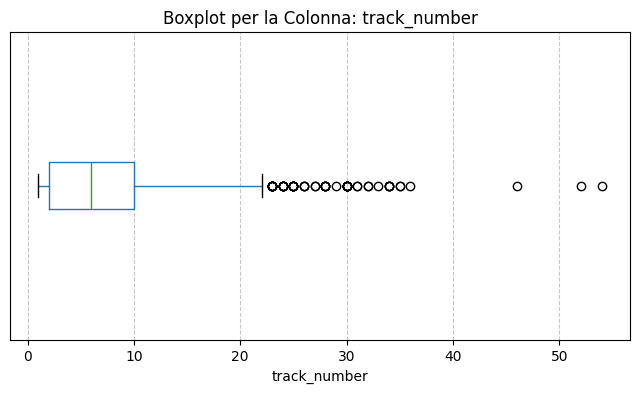

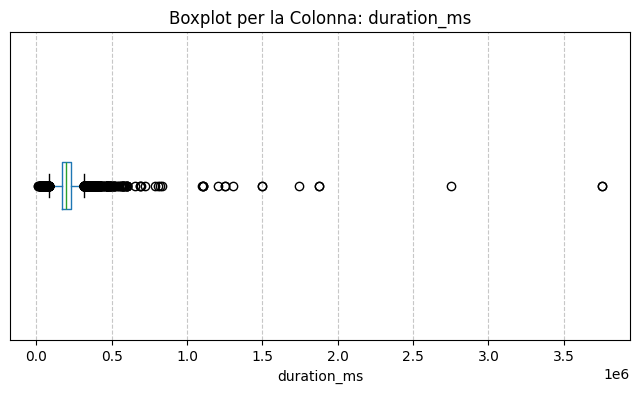

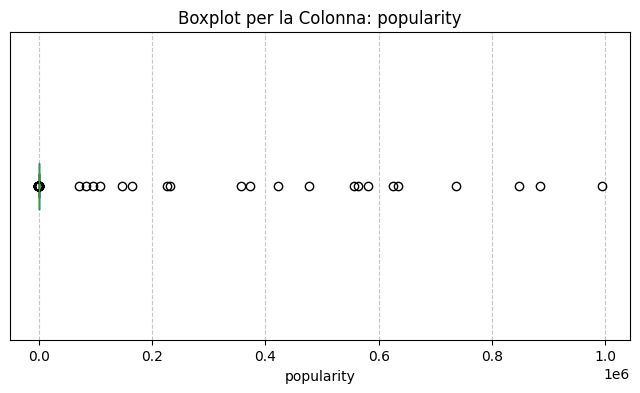

In [16]:
# Seleziona solo le colonne numeriche
df_numeric = df_tracks.select_dtypes(include=np.number)

# Scorri ogni colonna numerica e crea un boxplot separato
for col in df_numeric.columns:
    
    # Crea un nuovo grafico per la colonna corrente
    plt.figure(figsize=(8, 4))
    
    # Genera il boxplot. L'argomento vert=False lo rende orizzontale, più facile da leggere
    df_numeric.boxplot(column=col, vert=False)
    
    # Personalizzazione
    plt.title(f"Boxplot per la Colonna: {col}")
    plt.xlabel(col)
    plt.yticks([]) # Nasconde l'etichetta dell'asse Y (che non serve in un boxplot singolo)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    plt.show()

## 🔗 Pairwise Correlation Analysis: Uncovering Feature Relationships

Pairwise correlation analysis is a critical step in **Data Understanding** and **Exploratory Data Analysis (EDA)**. It quantifies the degree to which two different features in the dataset are related or co-vary. Understanding these relationships is vital for feature selection, model building (by avoiding multicollinearity), and gaining substantive insights into the data's structure.

We analyze feature relationships using two primary methods: **Pearson's $r$** and **Spearman's $\rho$ (rho)**.

---

### 1. Pearson's Correlation Coefficient ($r$)

Pearson's $r$ measures the **linear relationship** between two continuous, normally distributed variables. It assesses how well the data points fit a straight line.

* **Range:** The coefficient is a value between **-1.0 and +1.0**.
    * **$\mathbf{r \approx +1.0}$**: Strong positive linear correlation (variables increase together).
    * **$\mathbf{r \approx -1.0}$**: Strong negative linear correlation (as one increases, the other decreases).
    * **$\mathbf{r \approx 0}$**: Weak or no linear correlation.

* **Caveat:** Pearson's $r$ is sensitive to outliers and only detects linear relationships; non-linear but strong relationships (e.g., a perfect curve) would result in a value near zero.

---

### 2. Spearman's Rank Correlation Coefficient ($\rho$)

Spearman's $\rho$ is a **non-parametric** measure that assesses the **monotonic relationship** between the ranked values of two variables. It determines if the variables tend to change together, regardless of whether that relationship is strictly linear.

* **Method:** The original values are converted to their **ranks** (1st, 2nd, 3rd, etc.), and the standard Pearson correlation is applied to these ranks.
* **Utility:**
    * It is more **robust to outliers** than Pearson's.
    * It is suitable for **ordinal data** (data that has a clear order, like 'track number' or a rating scale).
    * It effectively captures non-linear, but consistent, relationships.

---

### 🖼️ Correlation Matrix Visualization

Both Pearson and Spearman coefficients are typically displayed in a **Heatmap**  visualization.

In this notebook, we generate correlation matrices using both methods to provide a comprehensive view of the feature relationships:

| Matrix | Purpose | Key Insights |
| :--- | :--- | :--- |
| **Pearson Matrix** | To identify **strong linear relationships** between continuous audio and linguistic features (e.g., `loudness` vs. `rms`). | Indicates direct, straight-line dependencies that may be useful for linear modeling. |
| **Spearman Matrix** | To identify **monotonic relationships** across all numerical and rank-based features (e.g., `track_number` vs. `popularity`). | Highlights trends, even if non-linear, which is crucial for features like `year` or `explicit` status. |

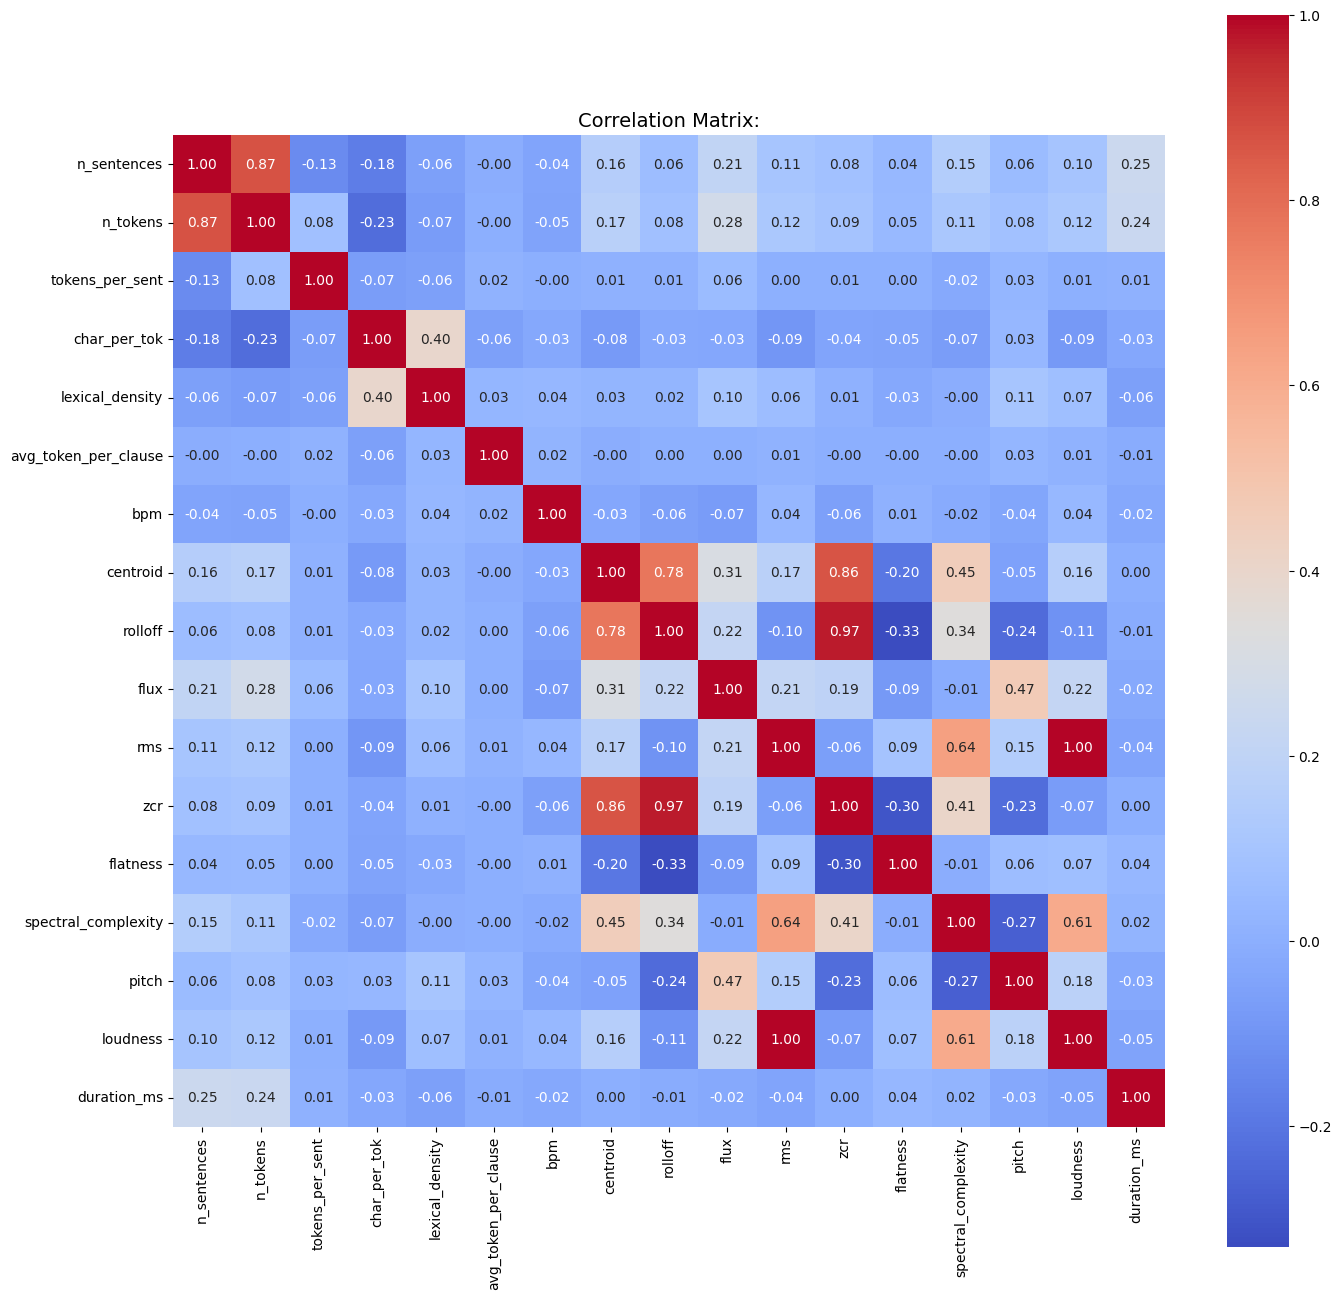

In [17]:
# 1. Define the list of meaningful numeric columns you want to plot
features = [
    'n_sentences',
    'n_tokens',
    'tokens_per_sent',
    'char_per_tok',
    'lexical_density',
    'avg_token_per_clause',
    'bpm',
    'centroid',
    'rolloff',
    'flux',
    'rms',
    'zcr',
    'flatness',
    'spectral_complexity',
    'pitch',
    'loudness',
    'duration_ms'
]

# 2. Select the subset of data
df_subset = df_tracks[features]

# 3. Calculate the correlation matrix on the subset
corr_matrix_subset = df_subset.corr()

# 4. Plot the results
plt.figure(figsize=(16, 16)) # Use a smaller figure size for fewer columns
sns.heatmap(corr_matrix_subset, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix:", fontsize=14)
plt.show()

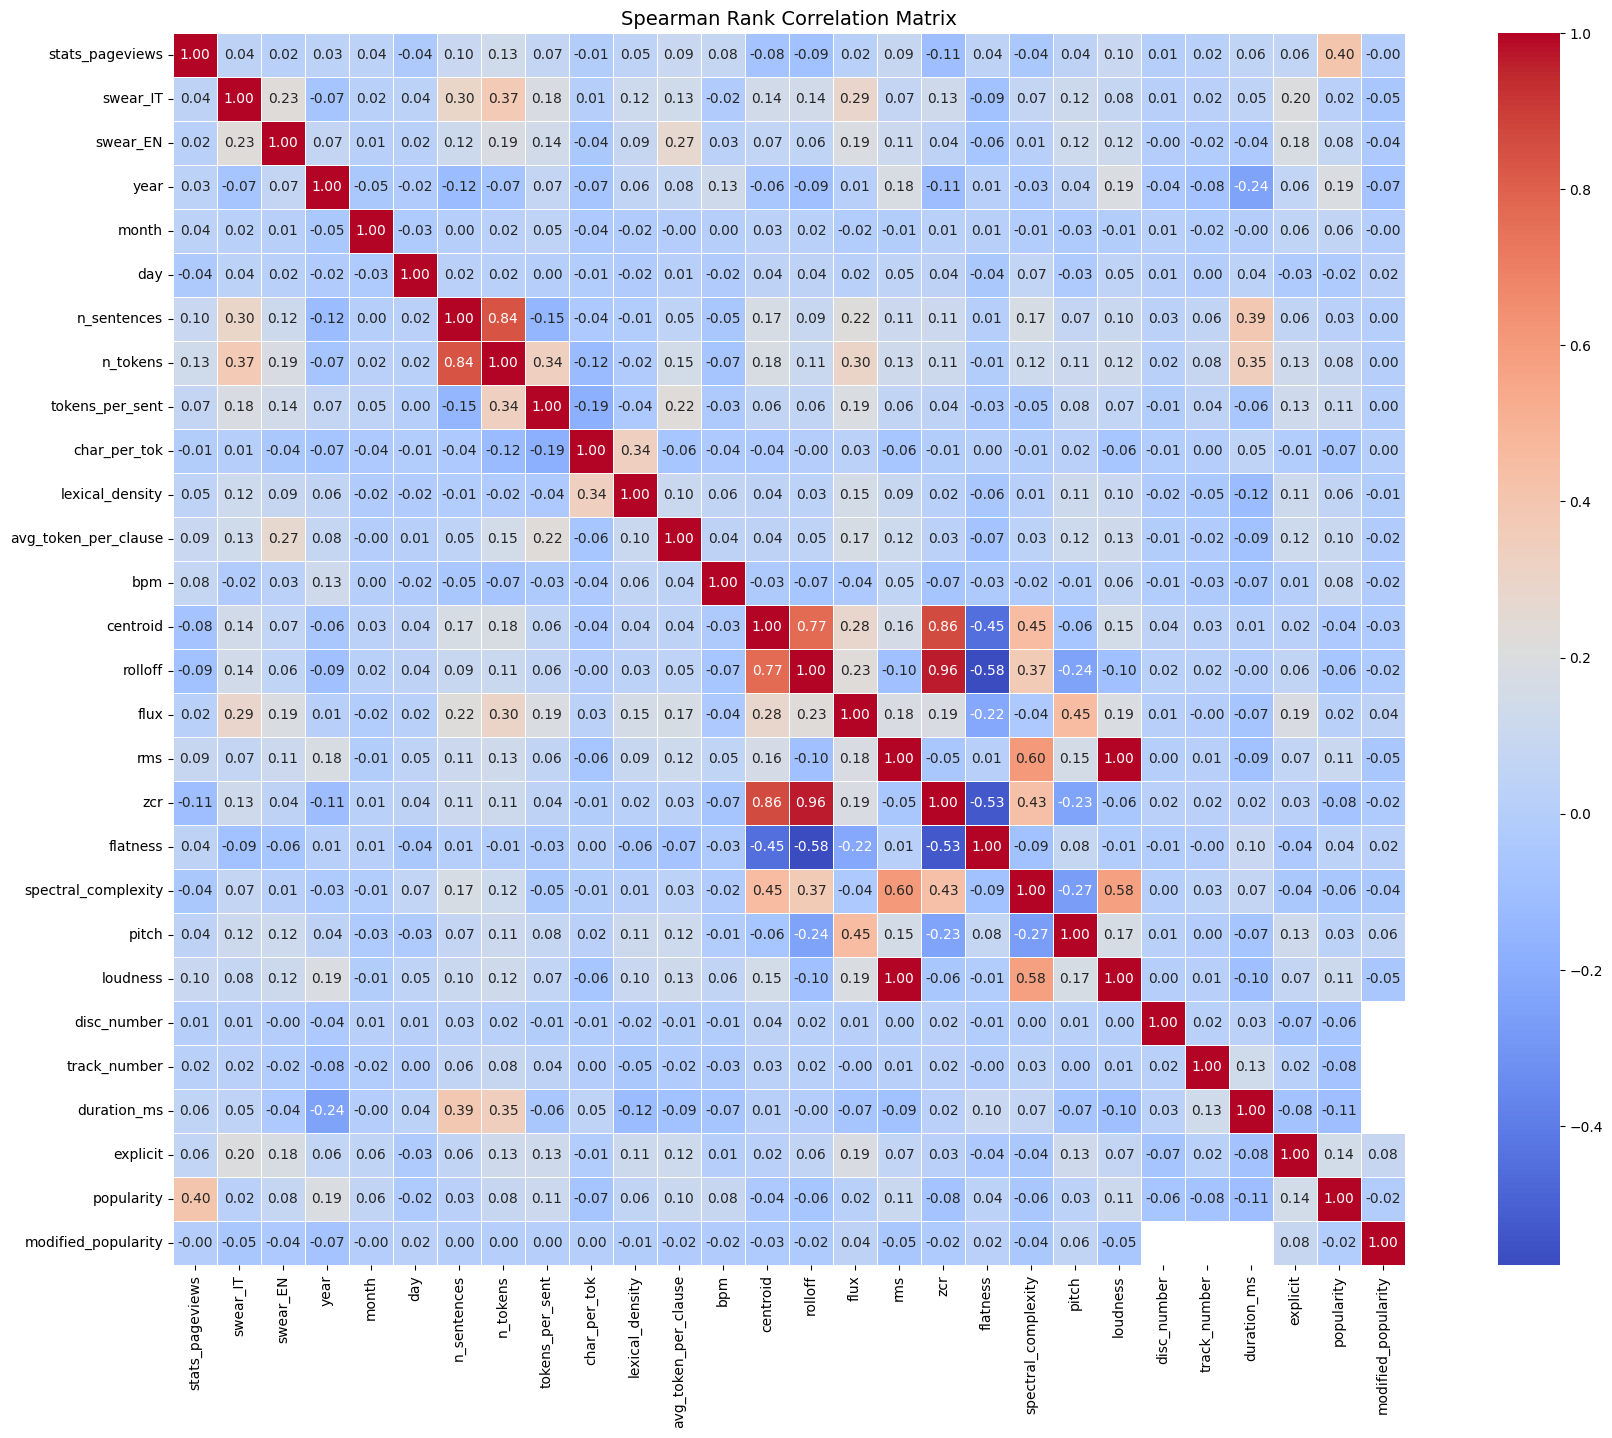

In [18]:
# 2. Calculate the correlation matrix using the Spearman method
# numeric_only=False is used here since we are explicitly selecting all desired numeric and boolean columns
corr_matrix_spearman = df_tracks.corr(method='spearman', numeric_only=True)

# 3. Plot the results
plt.figure(figsize=(24, 16))
sns.heatmap(
    corr_matrix_spearman,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=.5
)
plt.title("Spearman Rank Correlation Matrix", fontsize=14)
plt.show()

In [19]:
df_artists.to_csv('dataset/artists_data_casted.csv', sep = ';')
df_tracks.to_csv('dataset/tracks_data_casted.csv', sep = ',')